In [1]:
df <- read.csv('D:/3rd_Semester/6611_biostatisticalmethod/hw6/ProcedureCost.csv') 
summary(df)

   Procedure        Cost      
 Min.   :1.0   Min.   :0.000  
 1st Qu.:1.0   1st Qu.:0.000  
 Median :1.0   Median :0.660  
 Mean   :1.4   Mean   :1.129  
 3rd Qu.:2.0   3rd Qu.:1.885  
 Max.   :2.0   Max.   :5.750  

In [59]:
head(df)

Procedure,Cost
2,0.99
1,1.12
2,0.00
2,1.37
1,0.00
2,0.00


In [2]:
B <- 10^4 #set number of bootstraps

cost.ratio.mean <- numeric(B) #initialize vector to store results in

nS <- length(df$Procedure[df$Procedure==1]) #determine sample size of standard procedure
nN <- length(df$Procedure[df$Procedure==2]) #identify sample size with procedure 2

set.seed(515) #set seed for reproducibility

for (i in 1:B){
   Standard.boot <- sample(df$Cost[df$Procedure==1], nS, replace=T)
   New.boot <- sample(df$Cost[df$Procedure==2], nN, replace = TRUE)
   cost.ratio.mean[i] <- mean(New.boot)/mean(Standard.boot)
}

In [6]:
cost.ratio.mean[i]

[1] 0.7746649

In [3]:
mean(df$Cost); 
sd(df$Cost)

[1] 1.1286

[1] 1.321076

In [4]:
mean(df$Procedure); 
sd(df$Procedure)

[1] 1.4

[1] 0.4911273

In [56]:
quantile(df,c(0.025,0.975)) #bootstrap CI



ERROR: Error in `[.data.frame`(x, order(x, na.last = na.last, decreasing = decreasing)): undefined columns selected


In [7]:
mean(cost.ratio.mean)-(mean(df$Procedure)-mean(df$Cost)) #bias

[1] 0.4170746

In [8]:
sd(cost.ratio.mean) #bootstrap SE

[1] 0.1238035

In [9]:
quantile(cost.ratio.mean,c(0.025,0.975)) #bootstrap CI

(mean(cost.ratio.mean)-(mean(df$Procedure)-mean(df$Cost)))/
sd(cost.ratio.mean)

2.5%     97.5% 
0.4721292 0.9567234

[1] 3.368844

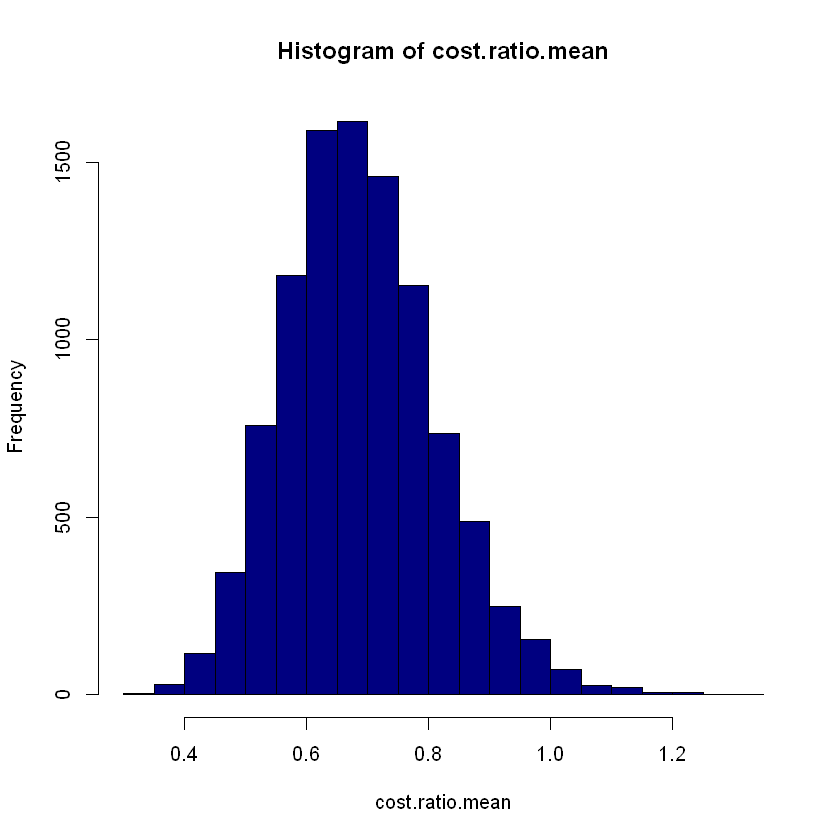

In [15]:
hist(cost.ratio.mean, col = "navy")

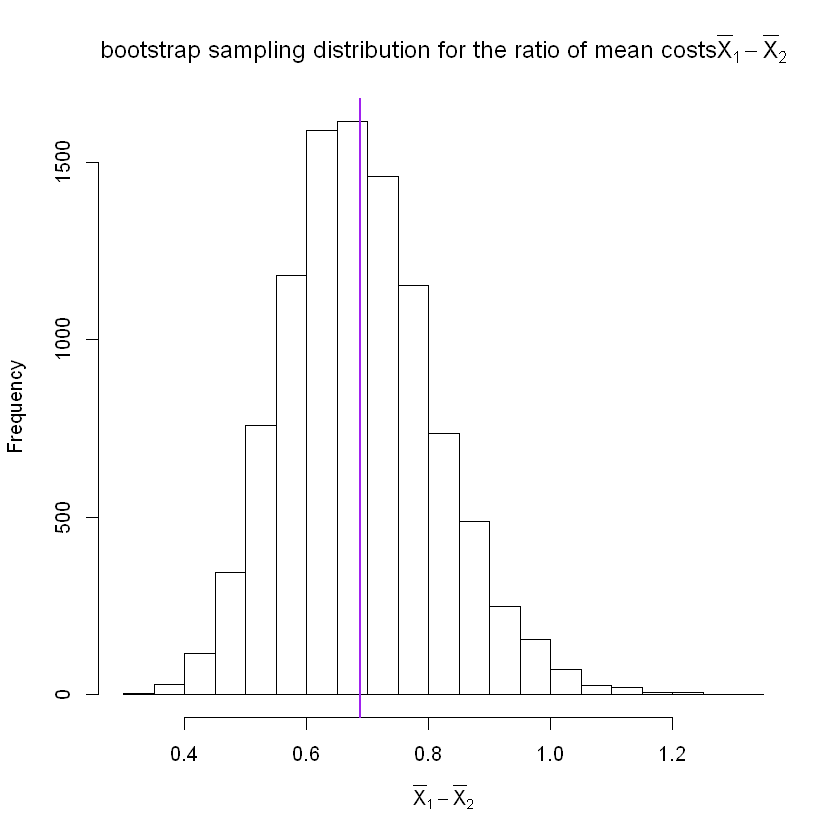

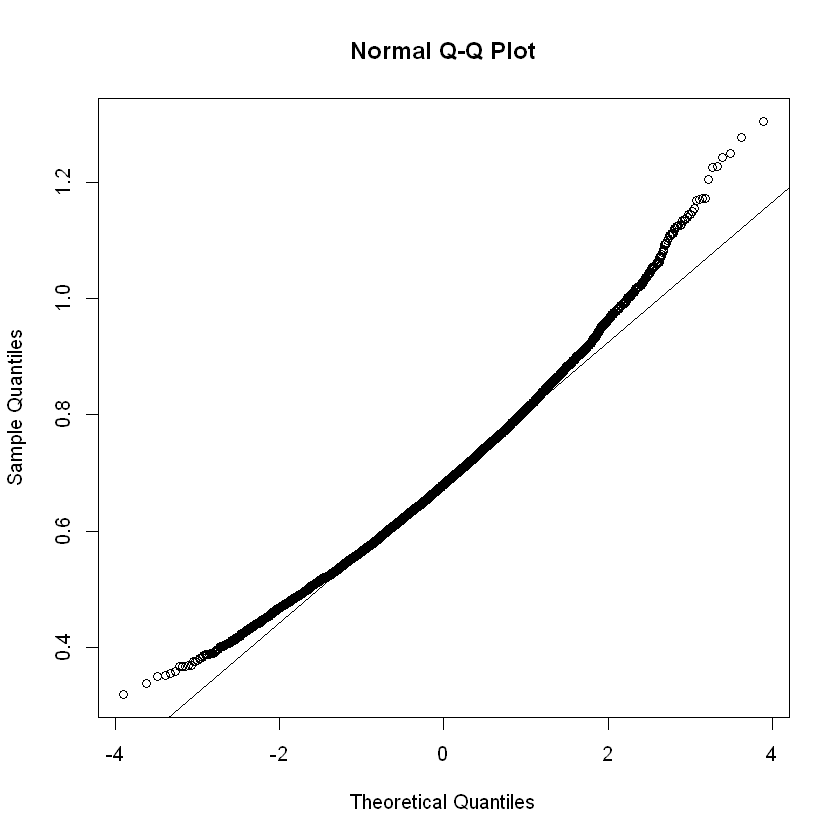

In [11]:
hist(cost.ratio.mean, main=expression(paste('bootstrap sampling distribution for the ratio of mean costs',
bar(X)[1] - bar(X)[2])), xlab=expression(bar(X)[1] - bar(X)[2]) )
abline(v=mean(cost.ratio.mean), col='purple', lwd=2)
qqnorm(cost.ratio.mean); qqline(cost.ratio.mean)

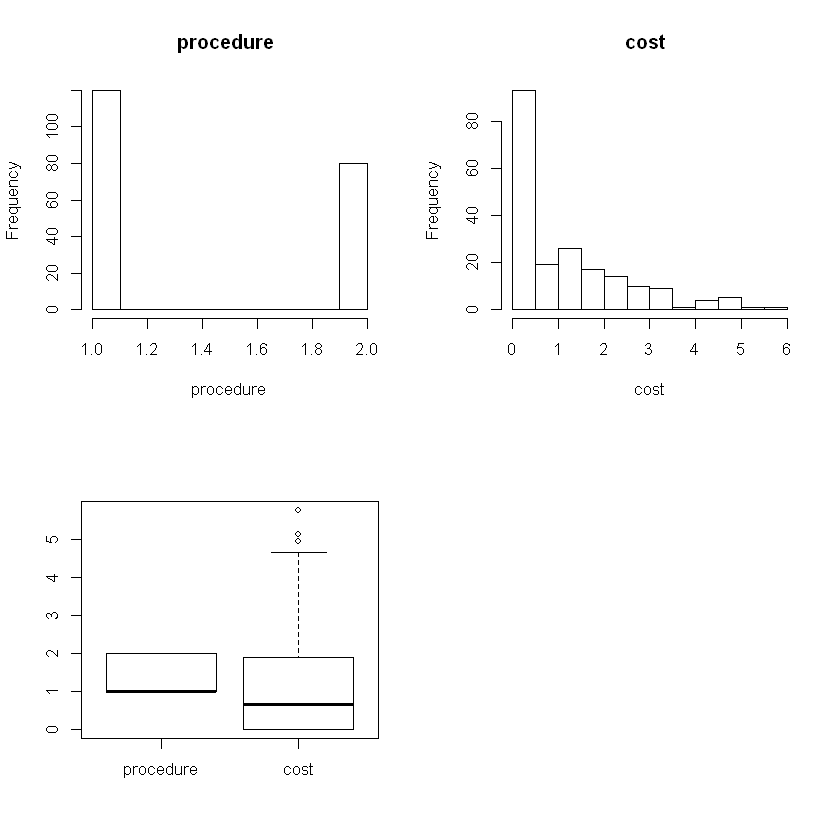

In [5]:
par(mfrow=c(2,2))
hist(df$Procedure, main='procedure ', xlab='procedure')
hist(df$Cost, main='cost ', xlab='cost')
boxplot(df$Procedure, df$Cost, names=c('procedure','cost'))

In [70]:
set.seed(54)
n.Basic <- length(df$Procedure)
n.Ext <- length(df$Cost)
B <- 10^4
times.diff.mean <- numeric(B)
for (i in 1:B){
# resample basic cable:
Basic.boot <- sample(df$Procedure, n.Basic, replace=TRUE)
# resample extended cable
Ext.boot <- sample(df$Cost, n.Ext, replace=TRUE)
# calculate difference in means
times.diff.mean[i] <- mean(Basic.boot)-mean(Ext.boot)
}

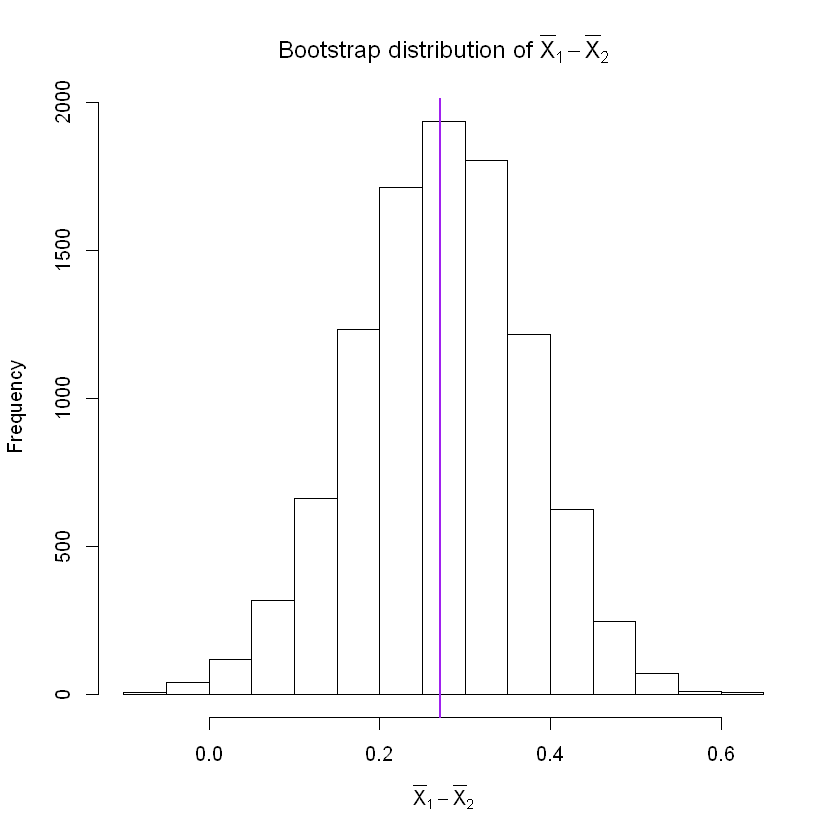

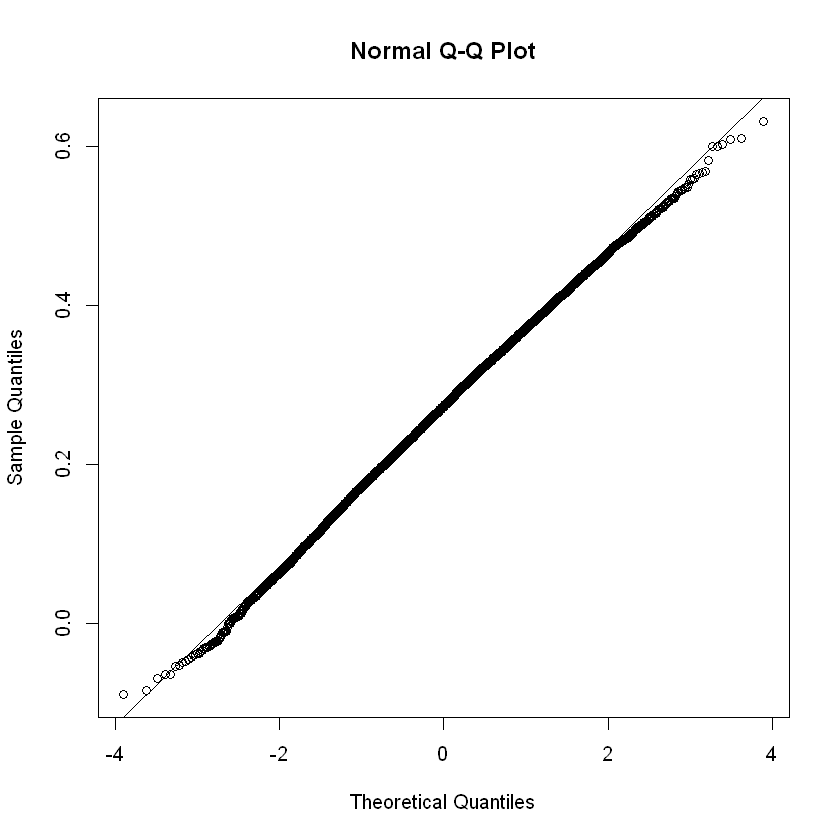

In [71]:
hist(times.diff.mean, main=expression(paste('Bootstrap distribution of ',
bar(X)[1] - bar(X)[2])), xlab=expression(bar(X)[1] - bar(X)[2]) )
abline(v=mean(times.diff.mean), col='purple', lwd=2)
qqnorm(times.diff.mean); qqline(times.diff.mean)

In [74]:
mean(df$Procedure)-mean(df$Cost) #sample difference
mean(times.diff.mean) #bootstrap estimated difference

mean(times.diff.mean)-(mean(df$Procedure)-mean(df$Cost)) #bias

sd(times.diff.mean) #bootstrap SE

[1] 0.2714

[1] 0.271133

[1] -0.00026699

[1] 0.1003106

# We see there is minimal bias in our bootstrap estimator for the difference in
mean commercial length.

In [75]:
quantile(times.diff.mean,c(0.025,0.975)) #bootstrap CI

(mean(times.diff.mean)-(mean(df$Procedure)-mean(df$Cost)))/
sd(times.diff.mean)

2.5%      97.5% 
0.06704375 0.46205500

[1] -0.002661634

In [17]:
install.packages("epitools")
library(epitools) # convert table to DF

package 'epitools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\Rtmpc1uIY6\downloaded_packages


Warning message:
"package 'epitools' was built under R version 3.6.3"
Attaching package: 'epitools'

The following object is masked from 'package:survival':

    ratetable



In [18]:
library(coin) # implement WRS

In [20]:
require(graphics)

In [23]:
x <- c(3, 3, 4, 5, 5, 5, 6, 7, 7, 8, 9, 15)
y <- c(6, 7, 7, 7, 8, 8, 8, 9, 9, 10, 10, 11)
wilcox.test(x, y, paired = TRUE, alternative = "greater")
wilcox.test(y - x, alternative = "less")    # The same.
wilcox.test(y - x, alternative = "less",
            exact = FALSE, correct = FALSE) 

Warning message in wilcox.test.default(x, y, paired = TRUE, alternative = "greater"):
"cannot compute exact p-value with ties"


	Wilcoxon signed rank test with continuity correction

data:  x and y
V = 11.5, p-value = 0.9869
alternative hypothesis: true location shift is greater than 0


Warning message in wilcox.test.default(y - x, alternative = "less"):
"cannot compute exact p-value with ties"


	Wilcoxon signed rank test with continuity correction

data:  y - x
V = 66.5, p-value = 0.9869
alternative hypothesis: true location is less than 0



	Wilcoxon signed rank test

data:  y - x
V = 66.5, p-value = 0.9855
alternative hypothesis: true location is less than 0


In [24]:
install.packages('BSDA')
library(BSDA)

package 'BSDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\Rtmpc1uIY6\downloaded_packages


Warning message:
"package 'BSDA' was built under R version 3.6.3"Loading required package: lattice

Attaching package: 'BSDA'

The following object is masked from 'package:datasets':

    Orange



In [46]:
Cauchy <- c(3,3,4,5,5,5,6,7,7,8,9,15)
Skellam <- c(6,7,7,7,8,8,8,9,9,10,10,11,13,13,15)
#sign test for one sample to compare to expected median of 9 days
SIGN.test(x=Cauchy, m=9)
SIGN.test(x=Skellam, m=9)


	One-sample Sign-Test

data:  Cauchy
s = 1, p-value = 0.01172
alternative hypothesis: true median is not equal to 9
95 percent confidence interval:
 4.106364 7.893636
sample estimates:
median of x 
        5.5 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt U.E.pt
Lower Achieved CI     0.8540 5.0000 7.0000
Interpolated CI       0.9500 4.1064 7.8936
Upper Achieved CI     0.9614 4.0000 8.0000



	One-sample Sign-Test

data:  Skellam
s = 6, p-value = 1
alternative hypothesis: true median is not equal to 9
95 percent confidence interval:
  7.178168 10.821832
sample estimates:
median of x 
          9 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt  U.E.pt
Lower Achieved CI     0.8815 8.0000 10.0000
Interpolated CI       0.9500 7.1782 10.8218
Upper Achieved CI     0.9648 7.0000 11.0000


In [73]:
sd(Cauchy)

[1] 3.287949

In [74]:
sd(Skellam)

[1] 2.613154

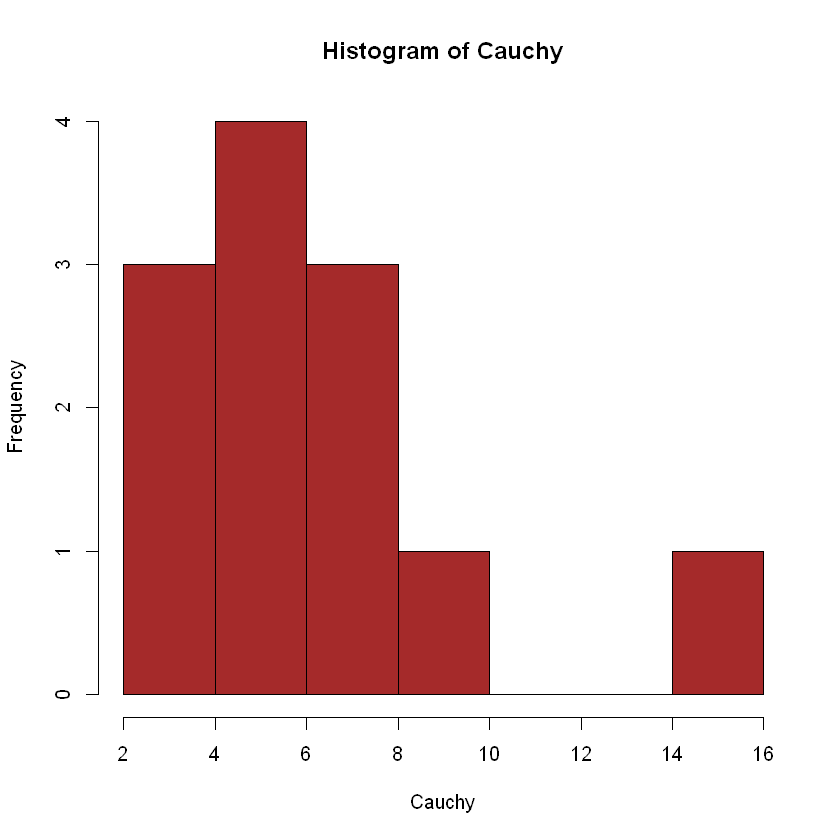

In [48]:
hist(Cauchy, col = "brown")

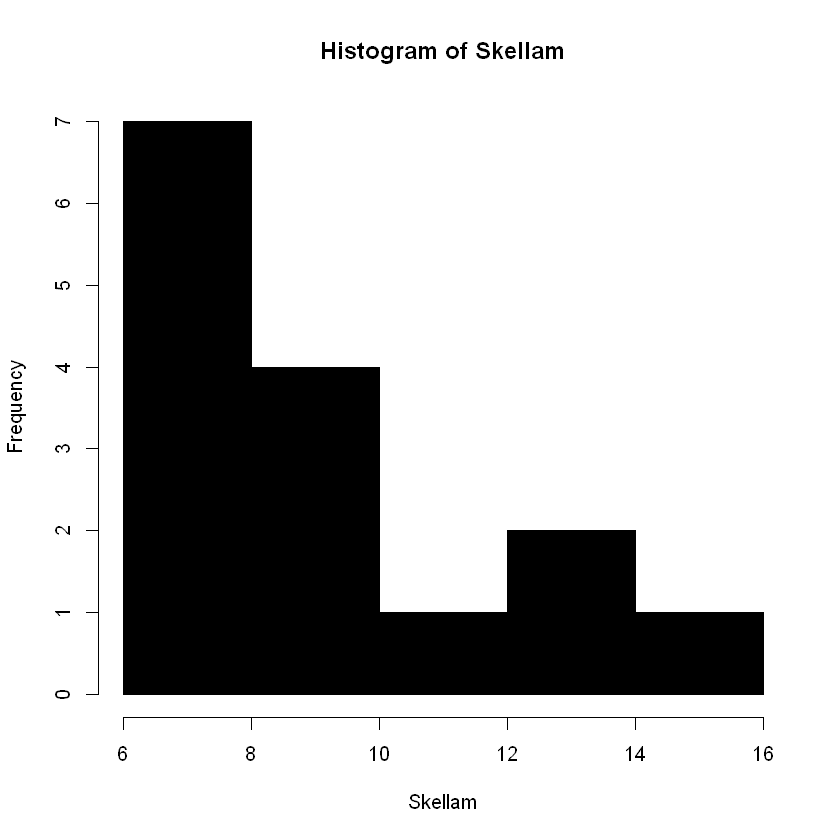

In [49]:
hist(Skellam, col = "black")

In [50]:
X <- matrix(nrow=13, byrow=T, c(2,0,1,0,3,0,1,1,2,3,1,3,1,2,0,2,0,1,0,0,0,2,0,0,0,1),
            dimnames=list(c(seq(3,15,1)),c("Cauchy_General","Skellam")))

In [76]:
Xd = as.data.frame(X, stringsAsFactors=FALSE)
Xd

,Cauchy_General,Skellam
3,2,0
4,1,0
5,3,0
6,1,1
7,2,3
8,1,3
9,1,2
10,0,2
11,0,1
12,0,0


In [32]:
library(MASS)  # load the MASS package 

In [53]:
wilcox.test( x=Xd$Cauchy_General, y=Xd$Skellam, exact=TRUE )

Warning message in wilcox.test.default(x = Xd$Cauchy_General, y = Xd$Skellam, exact = TRUE):
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  Xd$Cauchy_General and Xd$Skellam
W = 72, p-value = 0.516
alternative hypothesis: true location shift is not equal to 0


In [ ]:
wilcox.test( x=Xd$Cauchy_General, y=Xd$Skellam, exact=TRUE )

In [77]:
test <- wilcox.test(Xd$Cauchy_General ~ Xd$Skellam)
test

ERROR: Error in wilcox.test.formula(Xd$Cauchy_General ~ Xd$Skellam): grouping factor must have exactly 2 levels


In [54]:
 wilcox.test(Xd$Cauchy_General, Xd$Skellam, paired=FALSE)

Warning message in wilcox.test.default(Xd$Cauchy_General, Xd$Skellam, paired = FALSE):
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  Xd$Cauchy_General and Xd$Skellam
W = 72, p-value = 0.516
alternative hypothesis: true location shift is not equal to 0


In [60]:
mean(df)

Warning message in mean.default(df):
"argument is not numeric or logical: returning NA"

[1] NA

In [4]:
library(tidyr)
library(ggplot2)

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

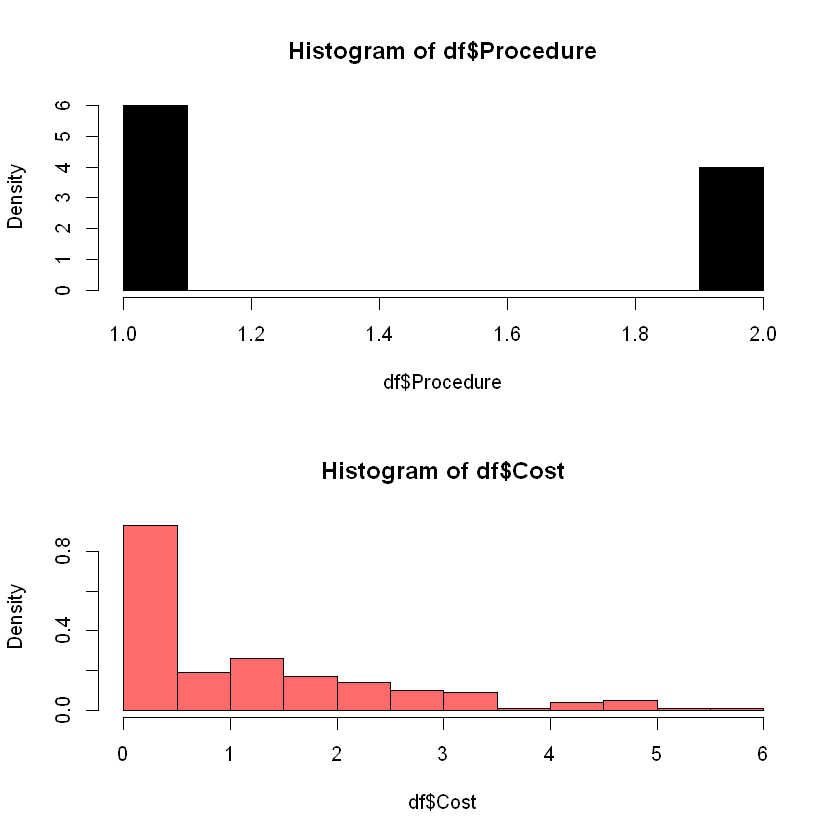

In [9]:
par(mfrow = c(2, 1))
hist(df$Procedure, col = "black", prob=TRUE)
hist(df$Cost, col = "indianred1", prob=TRUE)

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

[1] 1 3

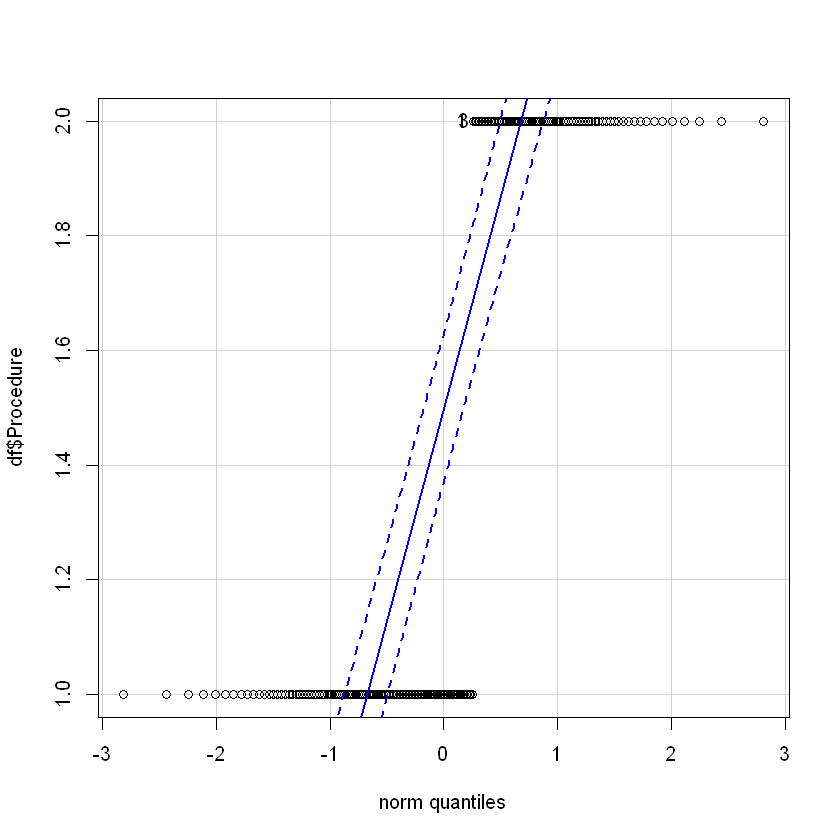

In [10]:
library("car")
qqPlot(df$Procedure)

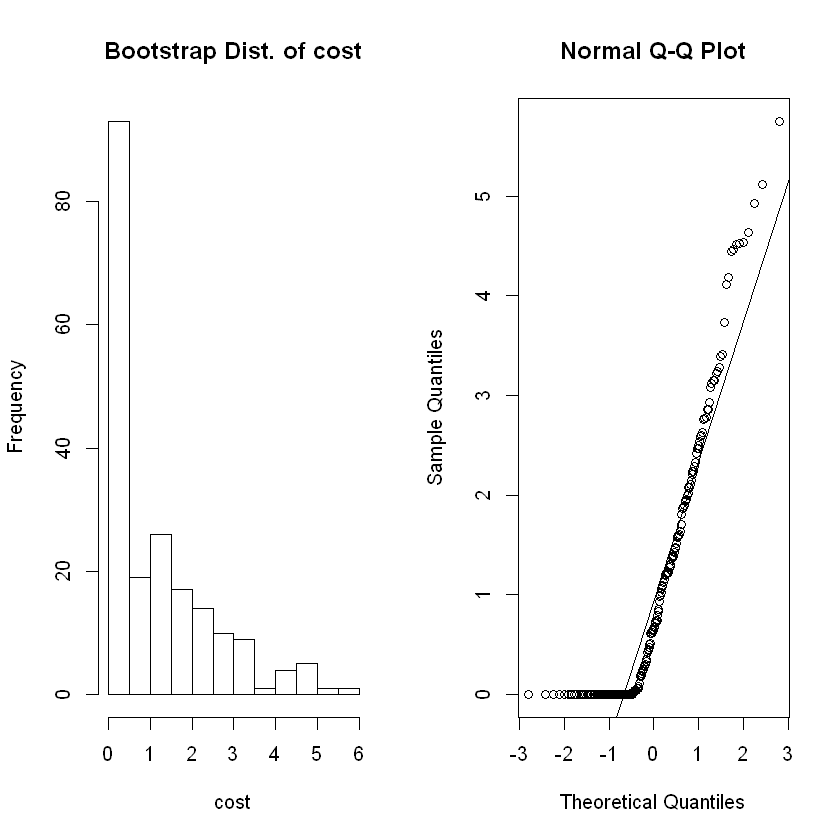

In [13]:
par(mfrow=c(1,2)) #create plotting area for 2 figures in one row

hist(df$Cost, main='Bootstrap Dist. of cost', xlab='cost')
qqnorm(df$Cost); qqline(df$Cost)

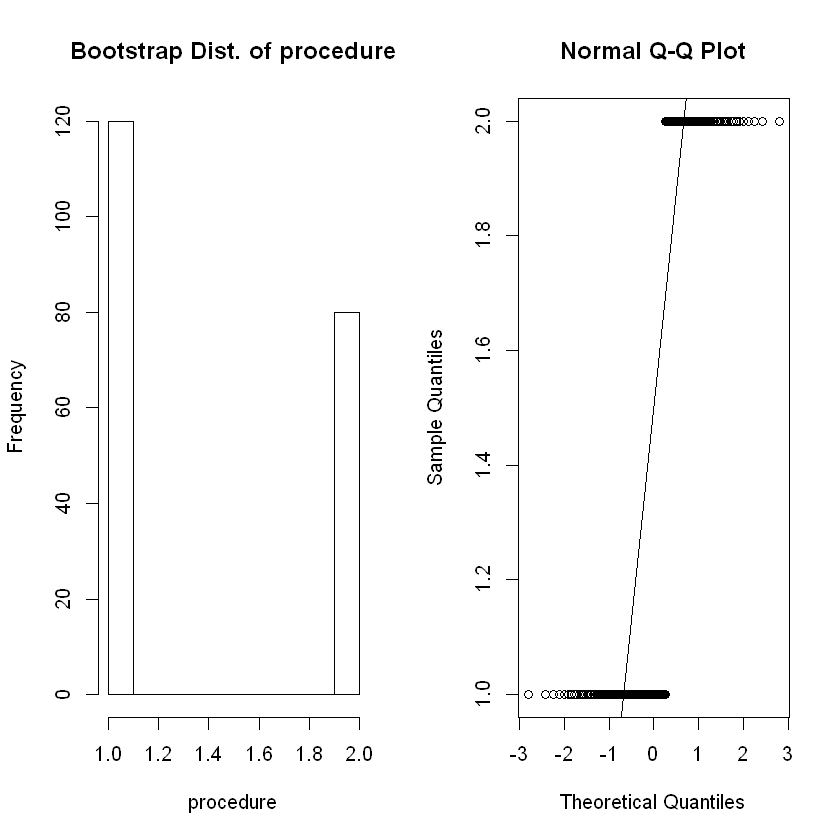

In [16]:
par(mfrow=c(1,2)) #create plotting area for 2 figures in one row

hist(df$Procedure, main='Bootstrap Dist. of procedure', xlab='procedure')
qqnorm(df$Procedure); qqline(df$Procedure)

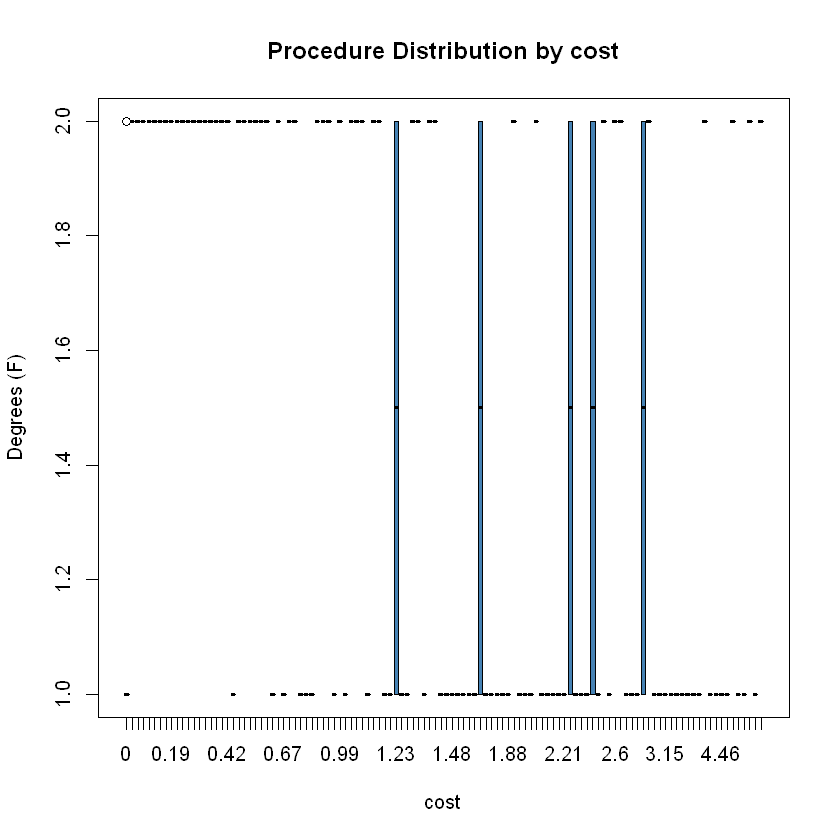

In [17]:
boxplot(Procedure~Cost,
data=df,
main="Procedure Distribution by cost",
xlab="cost",
ylab="Degrees (F)",
col="steelblue",
border="black"
)

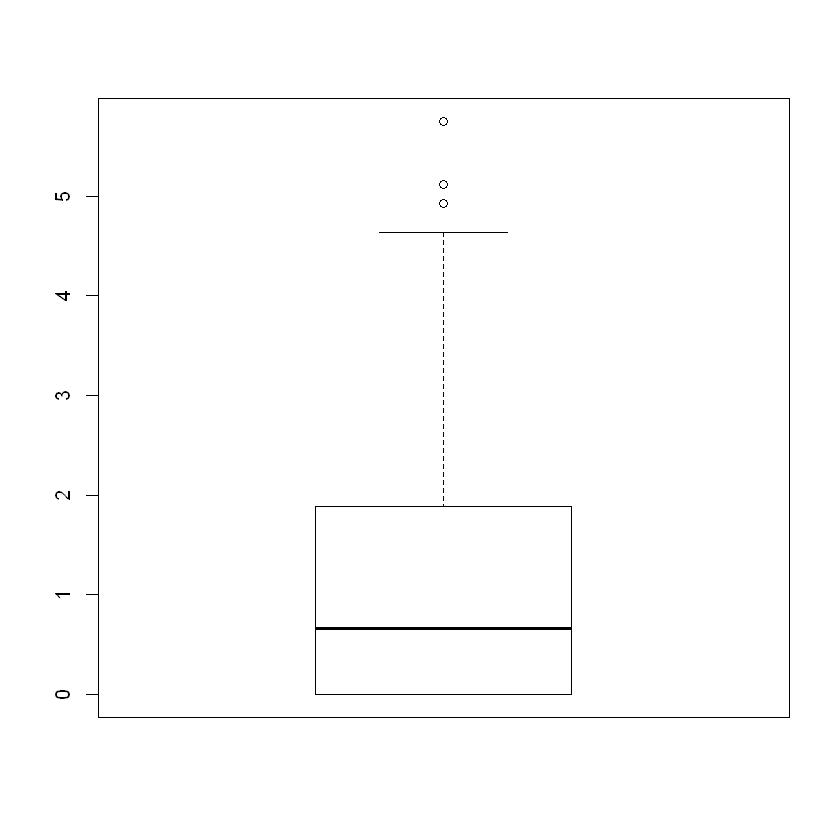

In [19]:
boxplot(df$Cost)

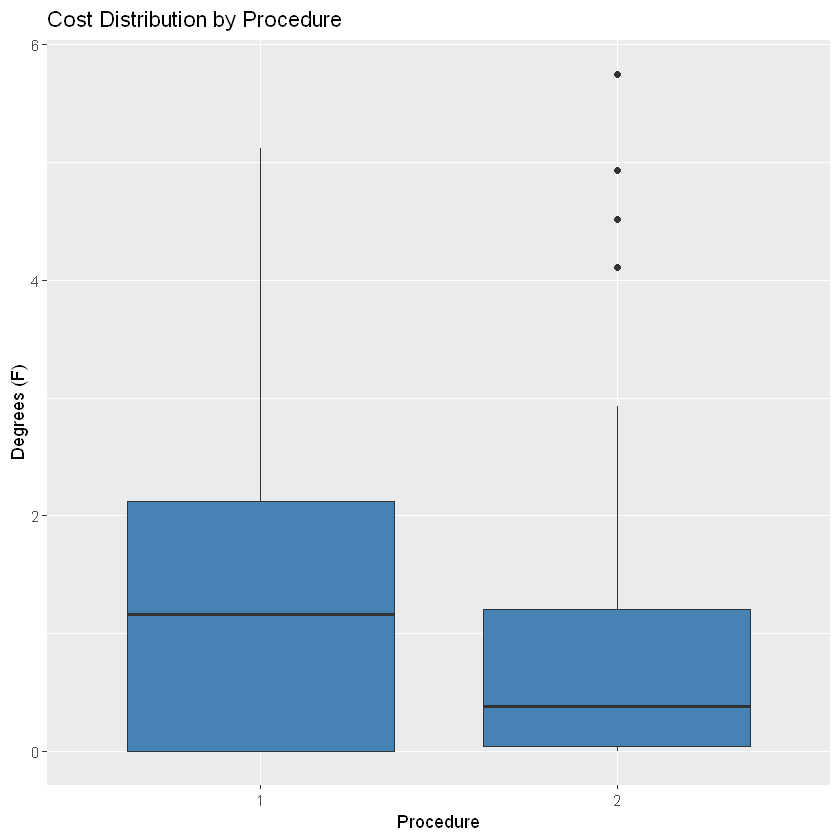

In [22]:
#create boxplot that displays temperature distribution for each month in the dataset
library(ggplot2)

ggplot(data = df, aes(x=as.character(Procedure), y=Cost)) +
    geom_boxplot(fill="steelblue") +
    labs(title="Cost Distribution by Procedure", x="Procedure", y="Degrees (F)")

In [29]:
install.packages("boot")

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpQN072p\downloaded_packages


In [63]:
library(boot)

Warning message:
"package 'boot' was built under R version 3.6.3"
Attaching package: 'boot'

The following object is masked from 'package:lattice':

    melanoma

The following object is masked from 'package:survival':

    aml



In [64]:
# create the Estimated Sampling Distribution of xbar
mean.function <- function(x, index) {
  d <- x[index]
  return(mean(d))  }

BootDist <- boot(data = df$Cost, statistic = mean.function, R=10000)

In [65]:
mean(BootDist$t)

[1] 1.130561

In [66]:
mean(BootDist$t)- mean(df) # bias

Warning message in mean.default(df):
"argument is not numeric or logical: returning NA"

[1] NA

In [67]:
sd(BootDist$t) # bootstrap SE

[1] 0.09351712

In [68]:
summary(BootDist$t)

       V1        
 Min.   :0.8015  
 1st Qu.:1.0675  
 Median :1.1287  
 Mean   :1.1306  
 3rd Qu.:1.1931  
 Max.   :1.5685  

In [58]:
install.packages("Rmisc")
library(Rmisc)
CI(df$Procedure, ci=0.95)


package 'Rmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\Rtmpc1uIY6\downloaded_packages


Warning message:
"package 'Rmisc' was built under R version 3.6.3"Loading required package: plyr


upper     mean    lower 
1.468482 1.400000 1.331518

In [61]:
CI(df$Cost, ci=0.95)
CI(df$Procedure, ci=0.95)

upper      mean     lower 
1.3128087 1.1286000 0.9443913

upper     mean    lower 
1.468482 1.400000 1.331518

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


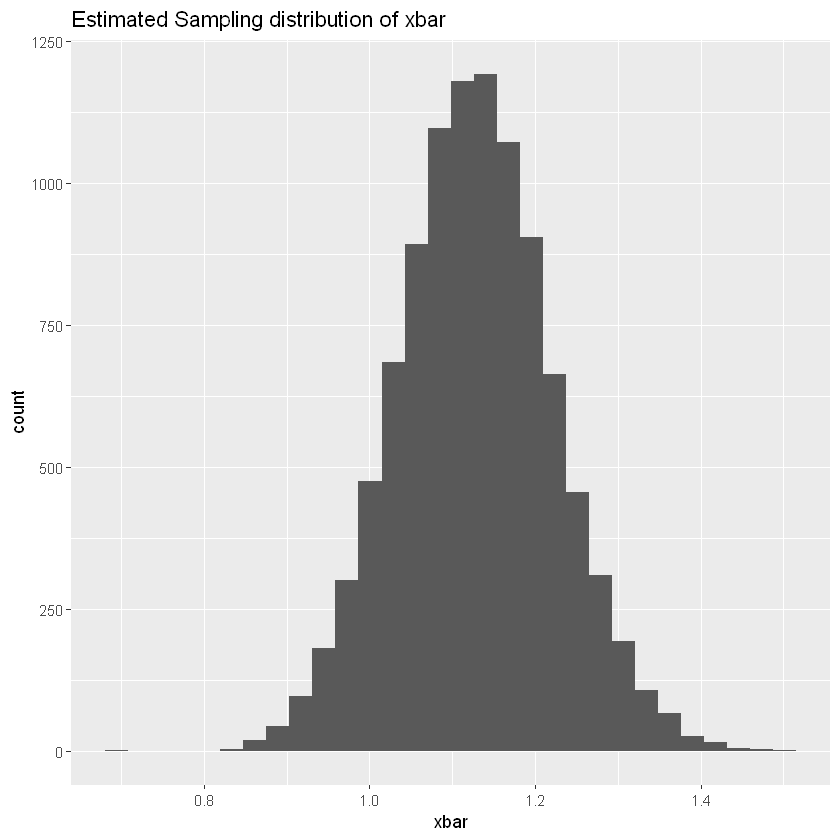

In [33]:
BootDist.graph <- data.frame(xbar=BootDist$t)
ggplot(BootDist.graph, aes(x=xbar)) +
  geom_histogram() + 
  ggtitle('Estimated Sampling distribution of xbar' )

In [34]:
 #calculate the 95% confidence interval using middle 95% of xbars
quantile( BootDist$t, probs=c(.025, .975) )

2.5%    97.5% 
0.948750 1.316455

https://dereksonderegger.github.io/570/3-confidence-intervals-via-bootstrapping.html

[1]   96 4136

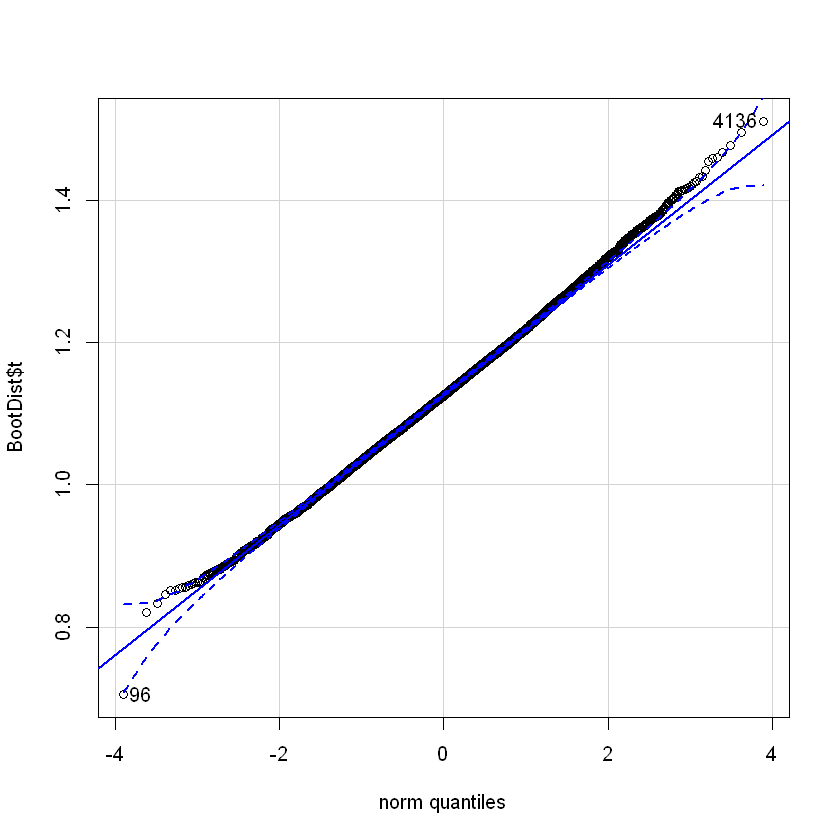

In [36]:
qqPlot(BootDist$t)

In [39]:
my.mean = function(x, indices) {
return( mean( x[indices] ) )
}
time.boot = boot(df$Procedure, my.mean, 10000)

boot.ci(time.boot)


Warning message in boot.ci(time.boot):
"bootstrap variances needed for studentized intervals"

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = time.boot)

Intervals : 
Level      Normal              Basic         
95%   ( 1.332,  1.469 )   ( 1.330,  1.470 )  

Level     Percentile            BCa          
95%   ( 1.330,  1.470 )   ( 1.325,  1.465 )  
Calculations and Intervals on Original Scale

In [43]:
df$std.err

NULL

In [40]:
install.packages("pastecs")
library(pastecs)

package 'pastecs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpQN072p\downloaded_packages


Warning message:
"package 'pastecs' was built under R version 3.6.3"
Attaching package: 'pastecs'

The following object is masked from 'package:tidyr':

    extract



In [44]:
stat.desc(time.boot)

ERROR: Error in as.data.frame.default(x): cannot coerce class '"boot"' to a data.frame


In [45]:
n <- length(df)
B <- 10000
# Initialize object to store results in
df.mean <- numeric(B)
# Implement bootstrap
for (i in 1:B){
x <- sample(df, n, replace = TRUE)
df.mean[i] <- mean(x)
}

Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not n

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"Warn

In [76]:
boot.mean = function(x,B,binwidth=NULL) {
n = length(x)
boot.samples = matrix( sample(x,size=n*B,replace=TRUE), B, n)
boot.statistics = apply(boot.samples,1,mean)
se = sd(boot.statistics)
require(ggplot2)
if ( is.null(binwidth) )
binwidth = diff(range(boot.statistics))/30
p = ggplot(data.frame(x=boot.statistics),aes(x=x)) +
geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(color="red")
plot(p)
interval = mean(x) + c(-1,1)*2*se
print( interval )
return( list(boot.statistics = boot.statistics, interval=interval, se=se, plot=p) )
}


[1] 0.9404865 1.3167135


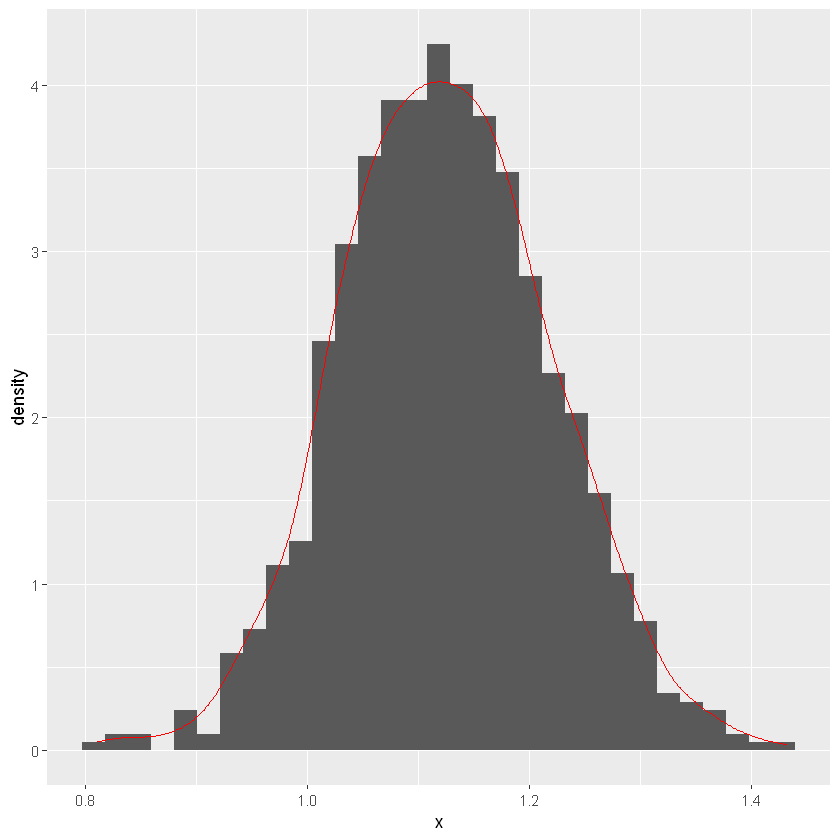

In [77]:
out = with(df, boot.mean(Cost, B = 1000))

In [78]:
summary(out)

                Length Class  Mode   
boot.statistics 1000   -none- numeric
interval           2   -none- numeric
se                 1   -none- numeric
plot               9   gg     list   

In [82]:
with(df, summary(Cost))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.660   1.129   1.885   5.750 

In [83]:
with(df, by(Cost, Procedure, mean, na.rm = TRUE))

Procedure: 1
[1] 1.29325
------------------------------------------------------------ 
Procedure: 2
[1] 0.881625

In [84]:
my.mean = function(x, indices) {
return( mean( x[indices] ) )
}
time.boot = boot(df$Cost, my.mean, 10000)


In [85]:
boot.ci(time.boot)


Warning message in boot.ci(time.boot):
"bootstrap variances needed for studentized intervals"

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = time.boot)

Intervals : 
Level      Normal              Basic         
95%   ( 0.947,  1.311 )   ( 0.943,  1.309 )  

Level     Percentile            BCa          
95%   ( 0.948,  1.314 )   ( 0.954,  1.318 )  
Calculations and Intervals on Original Scale

In [86]:
qqPlot(time.boot)

ERROR: Error in order(x[good]): unimplemented type 'list' in 'orderVector1'



In [69]:
observed_diff <- mean(df$Procedure) - mean(df$Cost)
pool_dat <- c(df$Procedure, df$Cost) # Combine data into one vector
N <- 10^4 - 1 # number of permutations
result <- numeric(N)
for(i in 1:N){
# Sample 10 values without replacement
index <- sample(length(pool_dat), size=10, replace=FALSE)
# Calculate difference
result[i] <- mean(pool_dat[index]) - mean(pool_dat[-index])
}

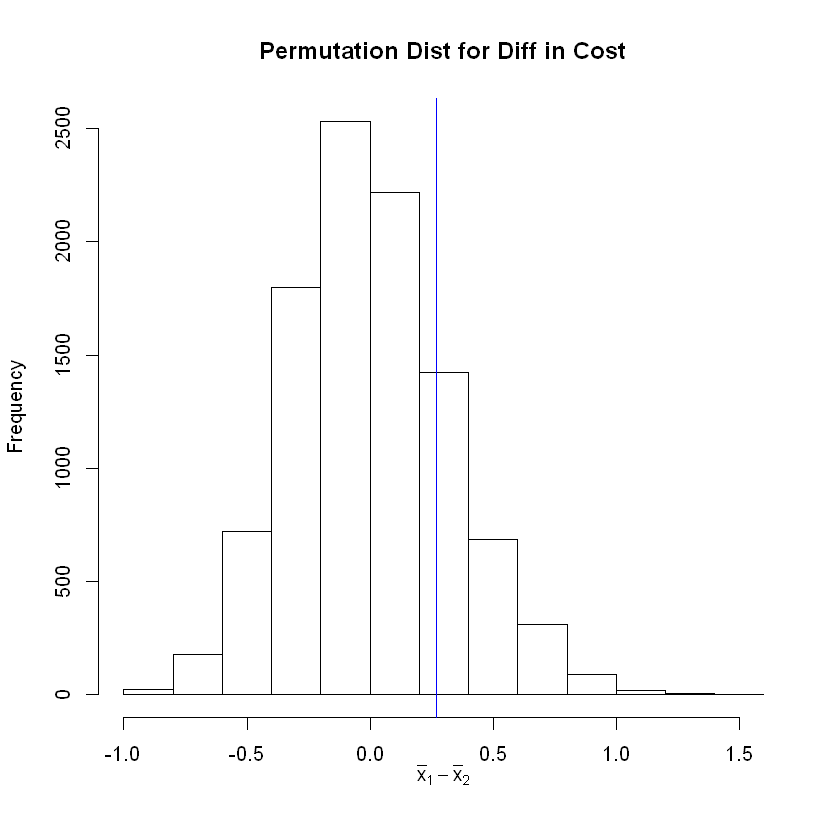

In [70]:
hist( result, xlab='',main='Permutation Dist for Diff in Cost')
mtext(text=expression(bar(x)[1]-bar(x)[2]), side=1, line=2)
abline(v = observed_diff, col='blue')

In [89]:
(sum(result >= observed_diff) + 1)/(N+1)

(sum(result <= -observed_diff) + 1)/(N+1)

[1] 0.1938

[1] 0.2033

# 1c

In [81]:
set.seed(200)
power3 <- rexp(n=100000, rate =3 )
mean(power3) 
var(power3) 

[1] 0.3343324

[1] 0.111331

# 2a,b and c

# For both type of distribution as random variable was not mentioned I considered 100 for both.

In [ ]:
set.seed(114)
normal <- rnorm(n=10000, mean=125, sd=8 )
exponential <- rexp(n=10000, rate=1.5)


In [88]:
for (i in 1:10000){
    x <- rnorm(100, mean=125, sd=8)
    mean(x)
    sd(x)
}

In [89]:
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  109.2   117.7   124.0   124.4   130.3   145.4 

In [90]:
mean(x)

[1] 124.3953

In [91]:
sd(x)

[1] 8.430643

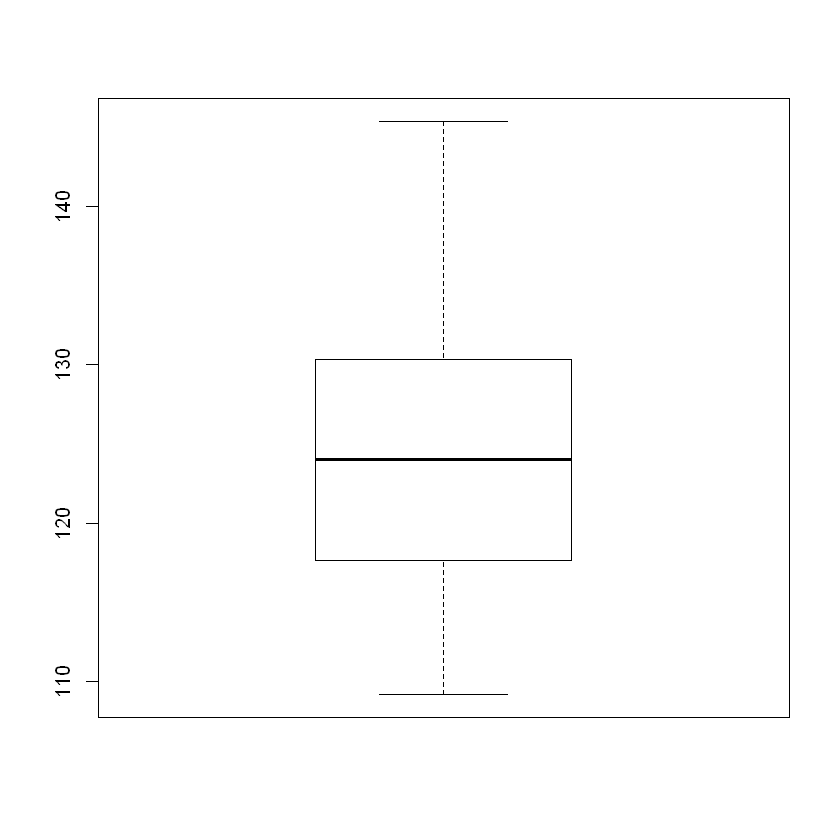

In [92]:
boxplot(x)

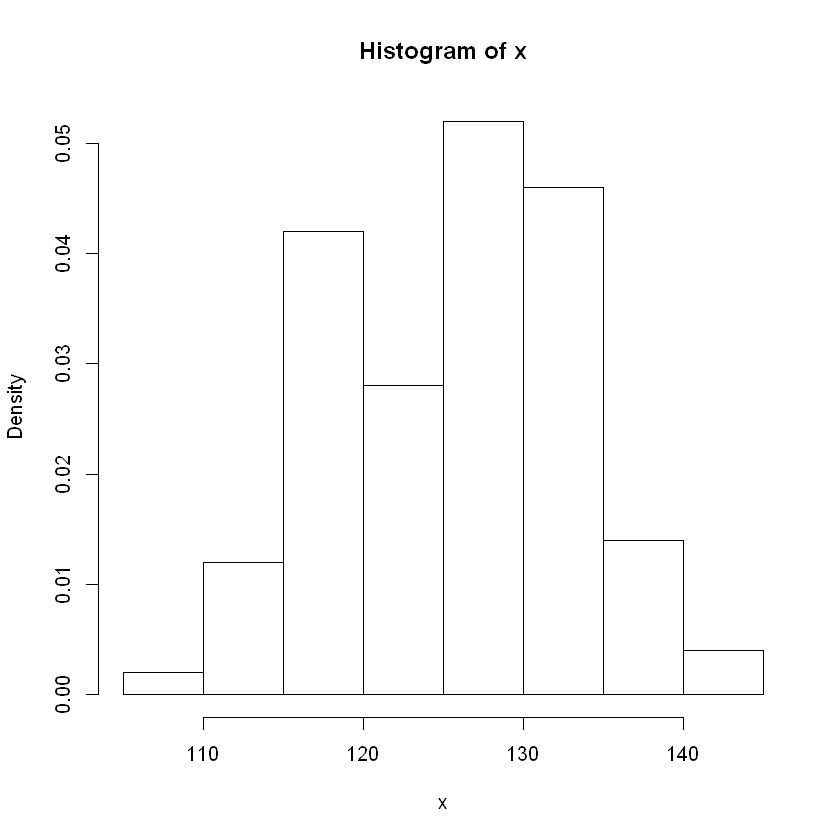

In [37]:
hist(x, prob=TRUE)

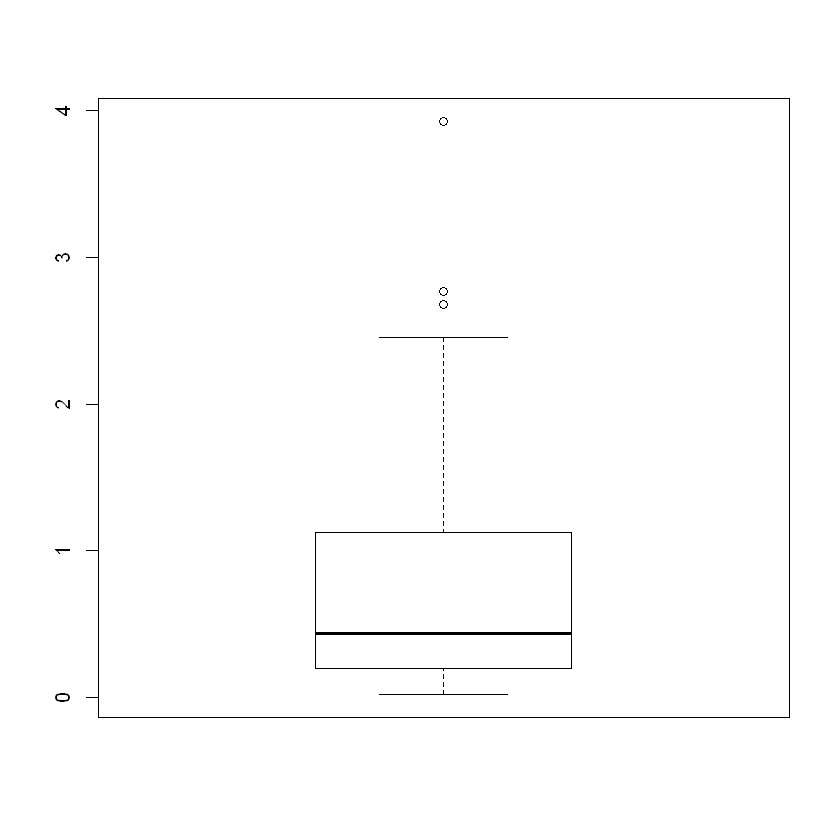

In [93]:
boxplot(expo)

In [38]:
set.seed(500)
for (i in 1:10000){
    expo <- rexp(100,rate = 1.5)
    expo_m <- mean(expo)
    expo_sd <- sd(expo)
    }

In [82]:
expo_m

[1] 0.7077412

In [39]:
summary(expo)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02151 0.20286 0.43574 0.70774 1.11050 3.92578 

In [40]:
expo_sd

[1] 0.7163936

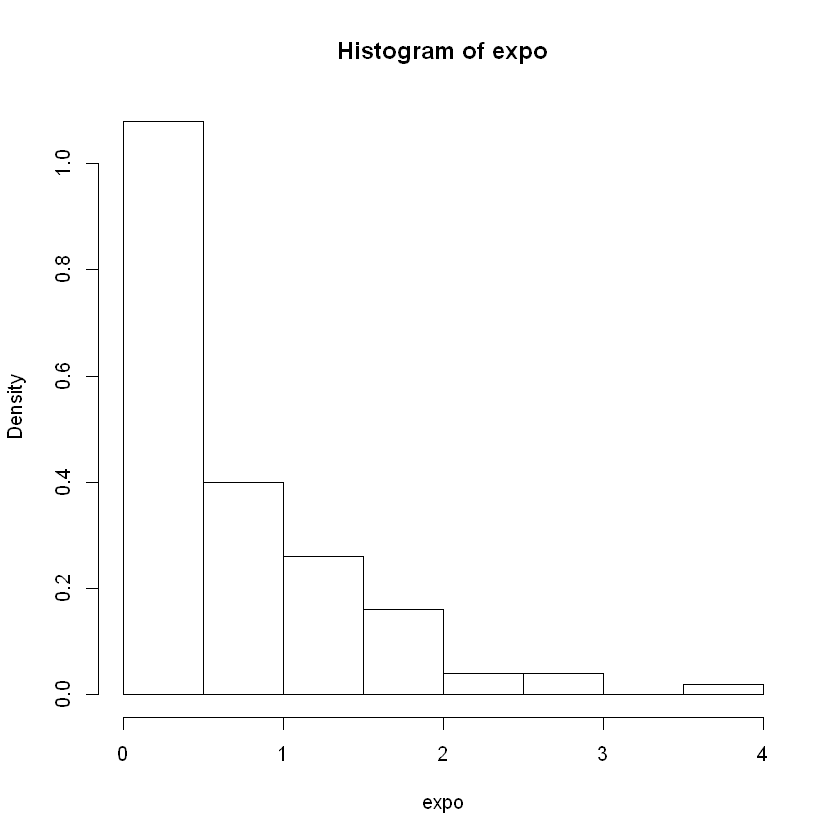

In [41]:
hist(expo, prob=TRUE)

# 3a. 


For a population that is normally distributed with mean 40 and
standard deviation 10, generate histograms showing the sampling
distribution of the mean, median, and variance. Use 1,000 simulation
iterations that each have a sample size of n = 10.

In [2]:
for (i in 1:1000){
    sample = rnorm(10, mean=40, sd=10)
    sample_m <- mean(sample)
    sample_median <- median(sample)
    sample_var <- var(sample)
    }

In [3]:
sample_var

[1] 149.9857

In [4]:
sample_m

[1] 44.17698

In [5]:
summary(sample)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.29   34.82   40.02   44.18   54.38   66.48 

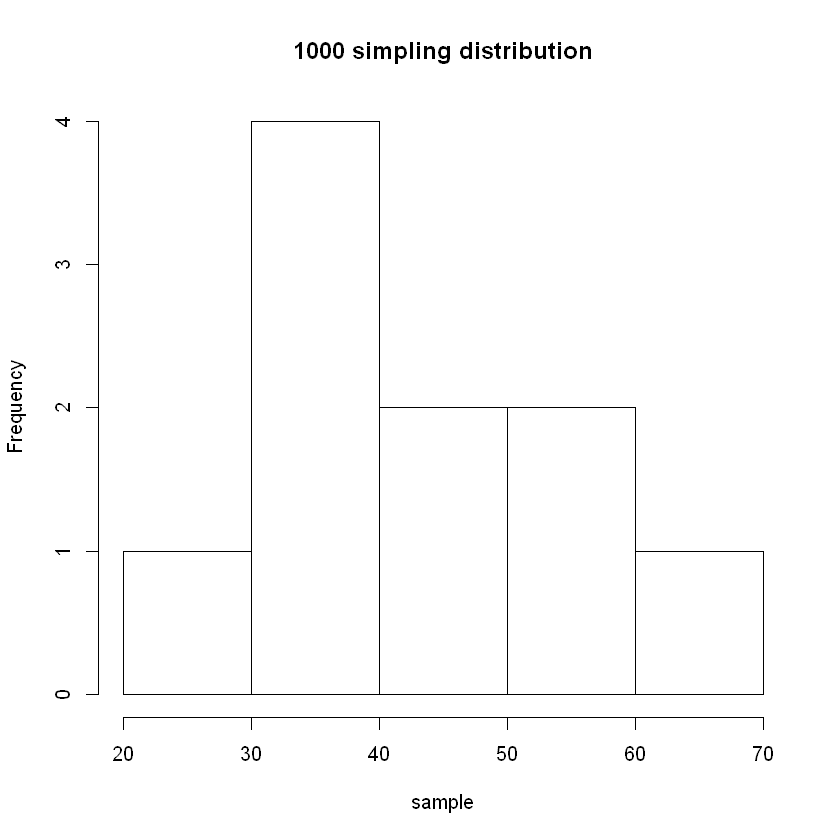

In [6]:
# Plot the graph. 
hist(sample, main = "1000 simpling distribution")


# 3b. 
Based on theory, what is the distribution of the sample mean
and sample median in this case (e.g., uniform, exponential, gamma,
normal, etc.)?

# 3c

n - 1 degrees of freedom i.e. 10-1 = 9 degress of freedom

ERROR: Error in curve(dchisq(sample, df = 9), add = T): 'expr' must be a function, or a call or an expression containing 'x'


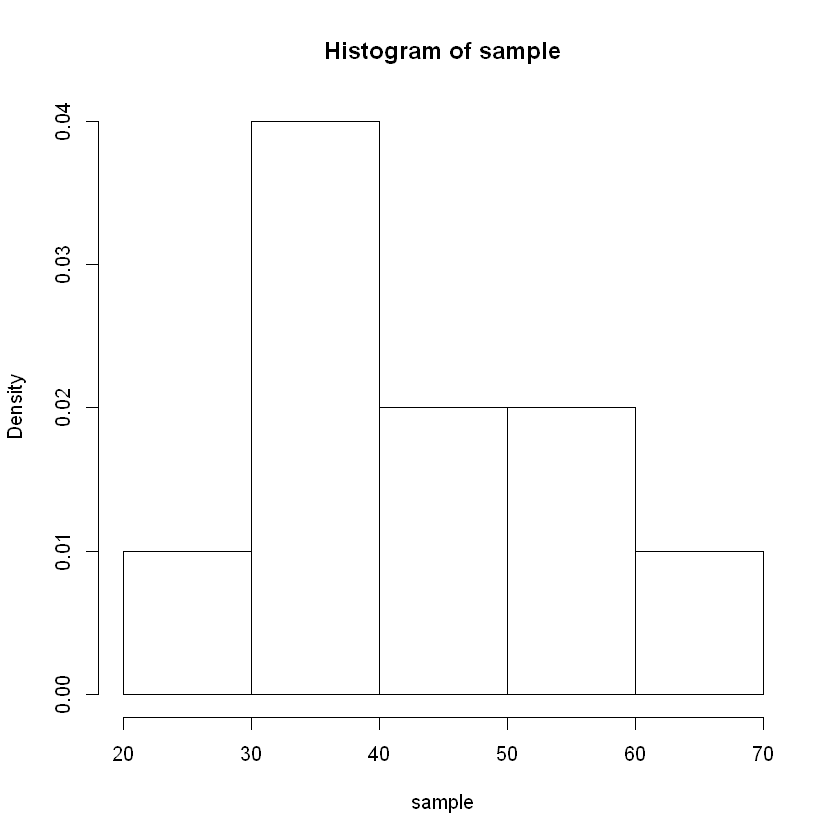

In [19]:
hist(sample,  probability = TRUE)

curve(dchisq(sample, df = 9), add = T)

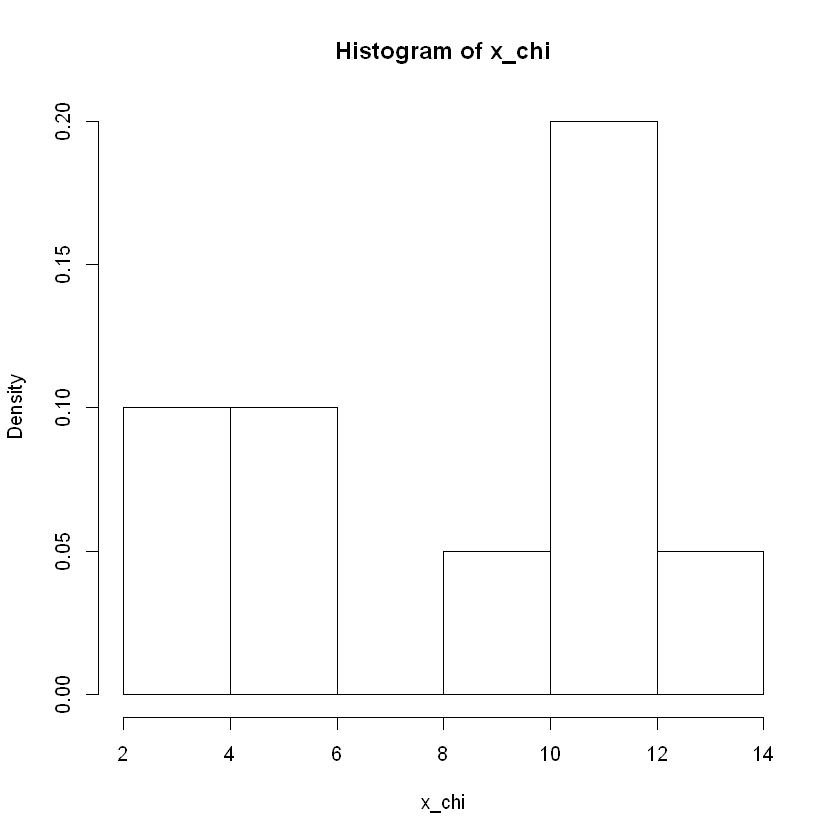

In [14]:
x_chi <- rchisq(sample, df = 9)
hist(x_chi, probability = TRUE)

In [54]:
chisq.test(x_chi) 


	Chi-squared test for given probabilities

data:  x_chi
X-squared = 12.773, df = 9, p-value = 0.1731


In [51]:
x_chi

[1] 11.382377  8.124863 11.683541 12.241840  3.473200  4.934781  3.713768
 [8] 10.121860 10.118685  5.906926

# 4a, b

In [37]:
n <- 10 # individual sample size
N <- 500 #No of simulations/sample size
Mat <- 5 # number of columns in the matrices
mean_v <- matrix(NA, N, Mat)
std <- matrix(NA, N, Mat)
iter <- 0
for (n in seq(10, 50, 10)) {
  i <- i + 1
  for (i in 1:N) {
    expt <- rbinom(n, 1, 0.15)
    mean_v[i] <- mean(expt)
    mean_all5_set <- mean(mean_v[i])
    std[i] <- sd(expt)
    std_allset <- sd(std[i])
    #print(mean_v[i])

  }
}


In [34]:
mean_all5_set

[1] 0.12

In [40]:
std[i]

[1] 0.3505098

In [20]:
set.seed(200)
for (i in 1:500){
    e1 <- rbinom(10, 1, 0.15)
    e1_m <- mean(e1)
    e1_sd <- sd(e1)
    }
print(e1)
print(e1_m)
print(e1_sd)

 [1] 0 0 0 0 0 0 0 0 0 0
[1] 0
[1] 0


In [27]:
E <- (e1+e2+e3+e4+e5)

Warning message in e1 + e2 + e3:
"longer object length is not a multiple of shorter object length"Warning message in e1 + e2 + e3 + e4:
"longer object length is not a multiple of shorter object length"Warning message in e1 + e2 + e3 + e4 + e5:
"longer object length is not a multiple of shorter object length"

In [21]:
set.seed(200)
for (i in 1:500){
    e2 <- rbinom(20, 1, 0.15)
    e2_m <- mean(e2)
    e2_sd <- sd(e2)
    }
print(e2)
print(e2_m)
print(e2_sd)

 [1] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
[1] 0.05
[1] 0.2236068


In [22]:
set.seed(200)
for (i in 1:500){
    e3 <- rbinom(30, 1, 0.15)
    e3_m <- mean(e3)
    e3_sd <- sd(e3)
    }
print(e3)
print(e3_m)
print(e3_sd)

 [1] 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0
[1] 0.2333333
[1] 0.4301831


In [23]:
set.seed(200)
for (i in 1:500){
    e4 <- rbinom(40, 1, 0.15)
    e4_m <- mean(e4)
    e4_sd <- sd(e4)
    }
print(e4)
print(e4_m)
print(e4_sd)

 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
[39] 0 0
[1] 0.1
[1] 0.3038218


In [24]:
set.seed(200)
for (i in 1:500){
    e5 <- rbinom(50, 1, 0.15)
    e5_m <- mean(e5)
    e5_sd <- sd(e5)
    }
print(e5)
print(e5_m)
print(e5_sd)

 [1] 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 1
[1] 0.12
[1] 0.3282607


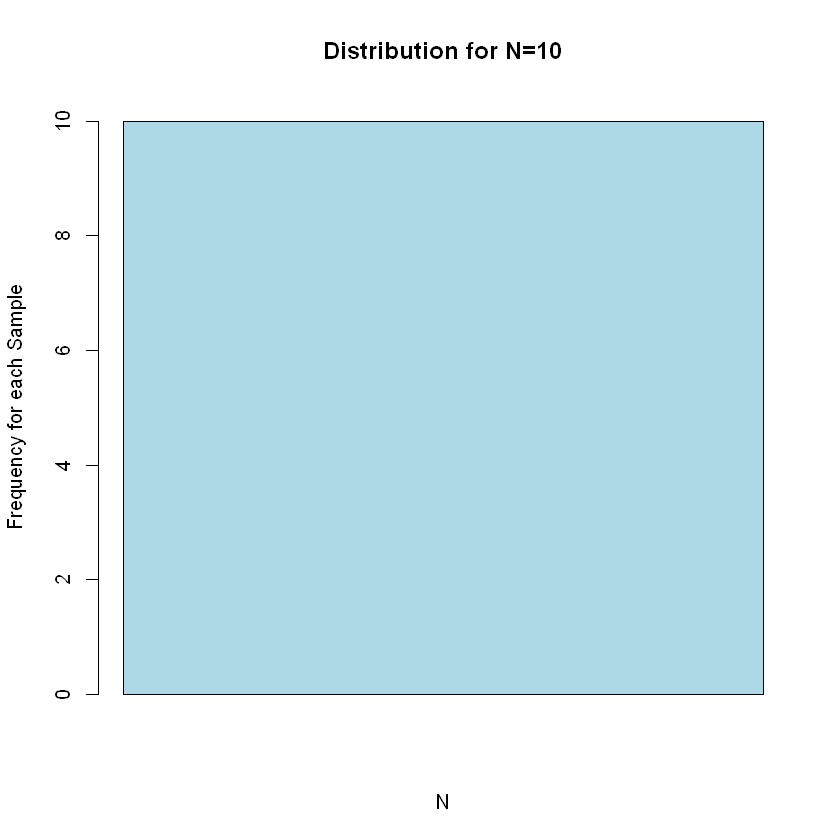

In [160]:
h1 <- hist(e1,  plot = FALSE)
plot(h1, xaxt = "n", xlab = "N", ylab = "Frequency for each Sample",
     main = "Distribution for N=10", col = "lightblue")

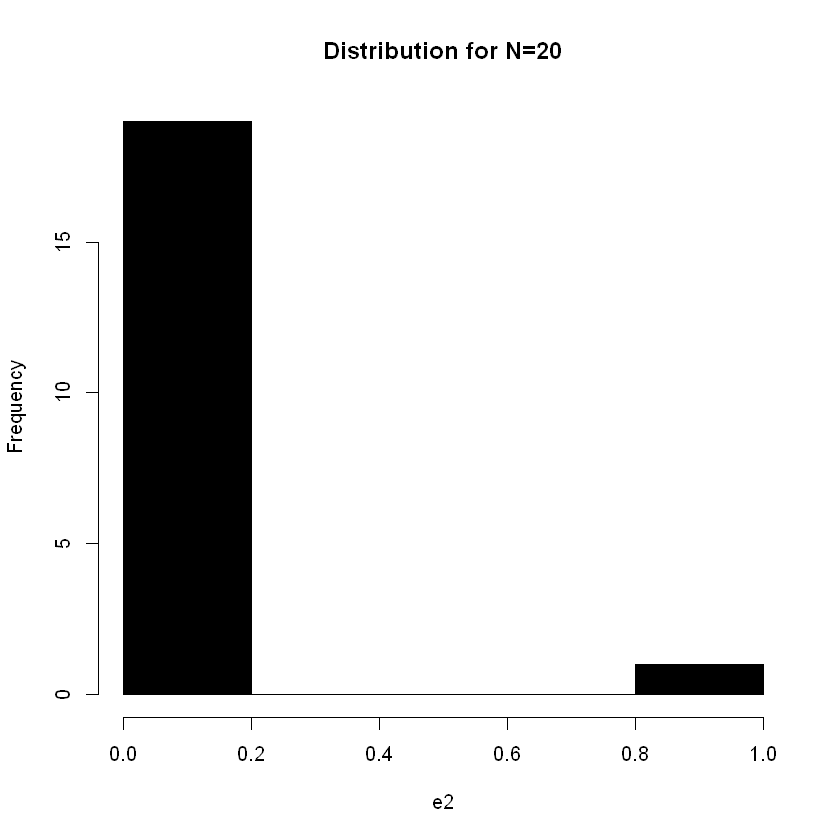

In [149]:
hist(e2,  col = "black", main = "Distribution for N=20")

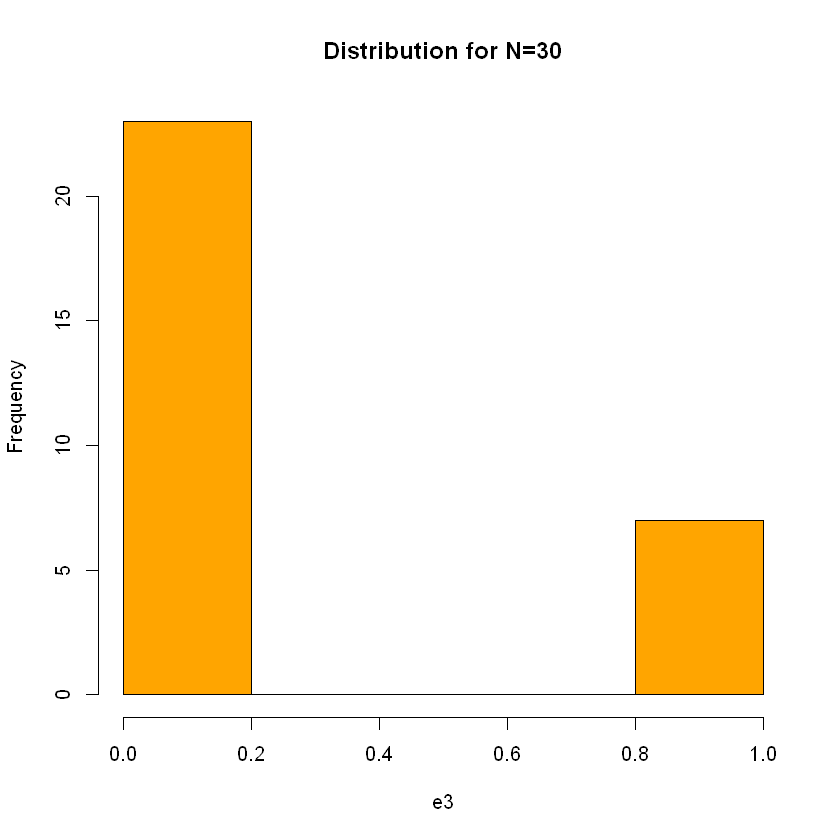

In [151]:
hist(e3,  col = "orange", main = "Distribution for N=30")

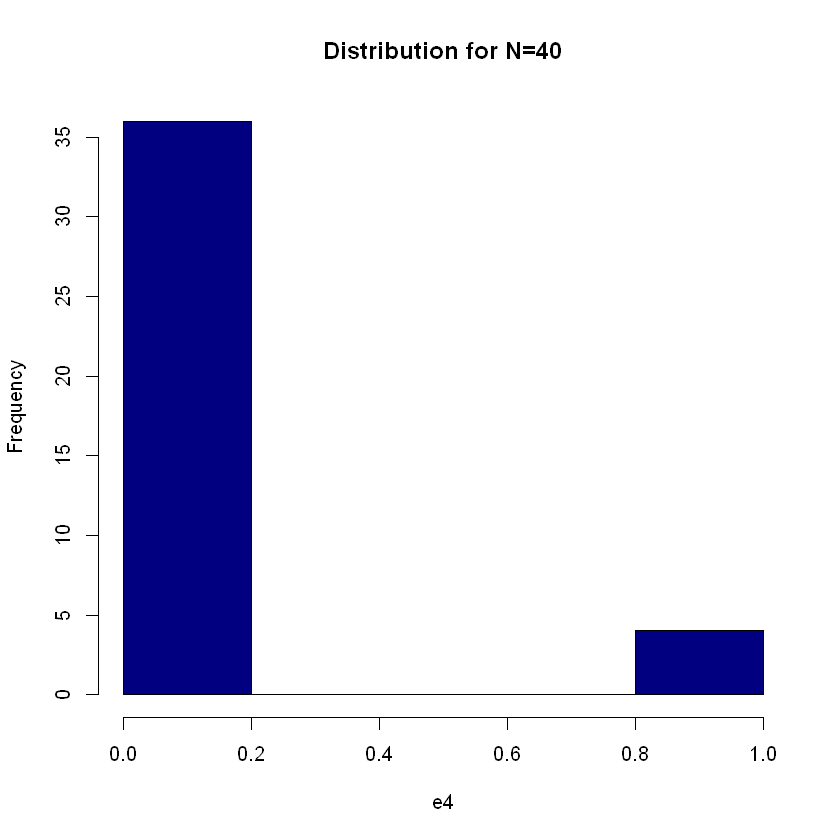

In [155]:
hist(e4,  col = "navy", main = "Distribution for N=40")

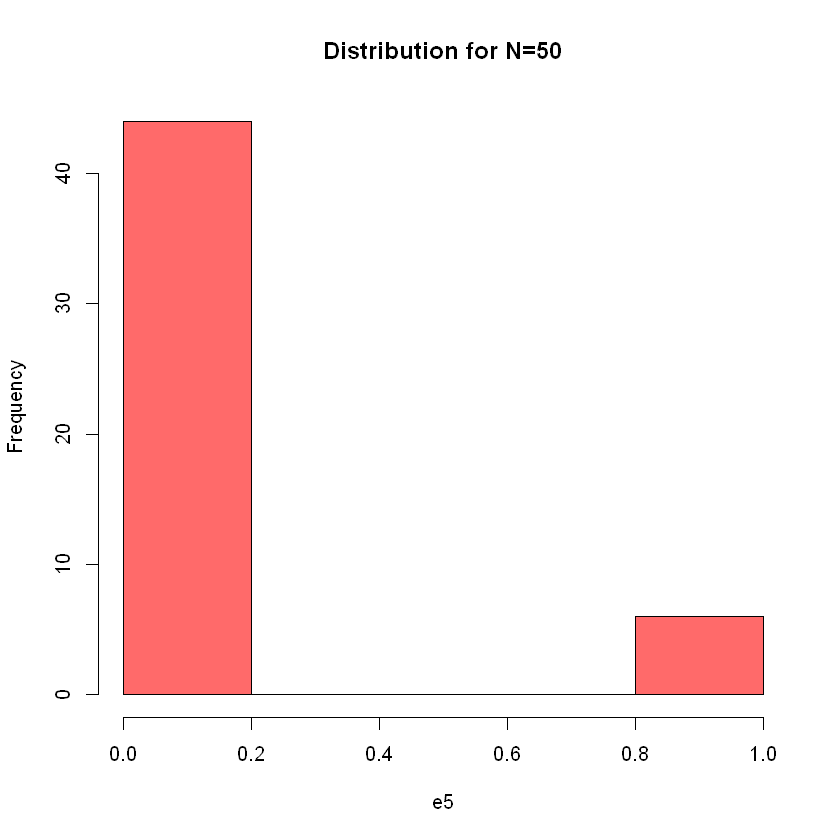

In [154]:
hist(e5,  col = "indianred1", main = "Distribution for N=50")

In [42]:
set.seed(200)
for (i in 1:500){
    rc1 <- rcauchy(n = 10)
    rc1_m <- mean(rc1)
    rc1_sd <- sd(rc1)
    }
print(rc1)
print(rc1_m)
print(rc1_sd)

 [1]   1.07368008   0.93974256   0.35538983   0.06431938  -1.58082644
 [6]  -0.90274178 -17.18311407   1.18200674  -3.21658988   0.39978741
[1] -1.886835
[1] 5.54819


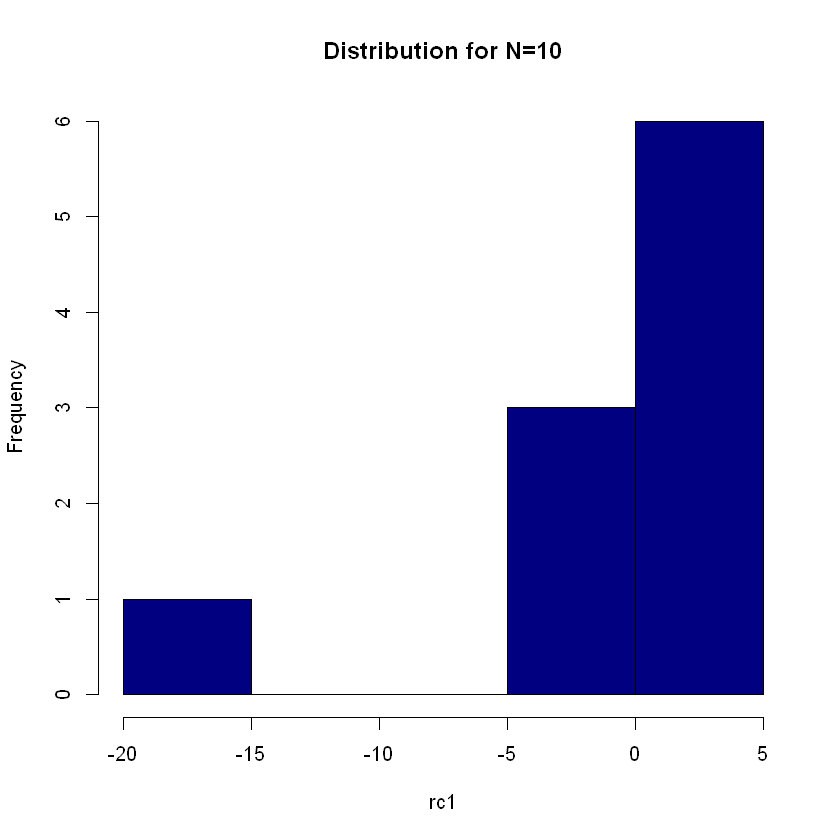

In [46]:
hist(rc1,  col = "navy", main = "Distribution for N=10")

In [44]:
set.seed(200)
for (i in 1:500){
    rc5 <- rcauchy(n = 50)
    rc5_m <- mean(rc5)
    rc5_sd <- sd(rc5)
    }
print(rc5)
print(rc5_m)
print(rc5_sd)

 [1]  -1.21276139   3.08993905   0.92801139  -0.64831822  -0.52886908
 [6]   0.75069209   0.09048257  -0.43833479  -0.82618157   2.35557389
[11]  -0.53944986   0.25232688  -0.24287857   7.51824915   4.11764297
[16]   0.23595263 -15.46702307 -15.49562218   1.89657906  -0.36122027
[21]   0.57025279  -0.68638909   0.17211479  -1.14282179   4.57021006
[26]   0.55820792   0.20048265  -0.66960840  -0.78823291   1.22082233
[31]  -0.44987245   2.92342389  -0.08422889 -31.46436426  11.71096830
[36]  -2.64202151   3.33946033   0.12235671  -1.56479500  -1.18759006
[41]  -0.56608259   0.74877076  14.13946914 -14.31351619   0.68565910
[46]   4.38180222  -0.75063181   4.29658773   1.24774743  -0.31828002
[1] -0.4053062
[1] 6.697945


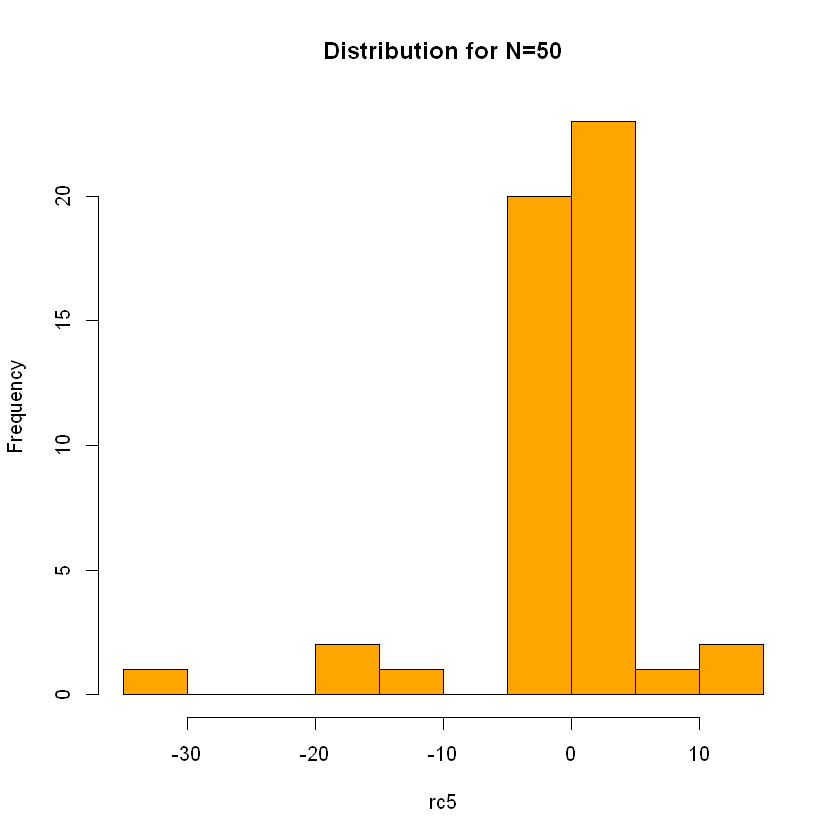

In [45]:
hist(rc5,  col = "orange", main = "Distribution for N=50")

In [47]:
set.seed(200)
for (i in 1:500){
    rc10 <- rcauchy(n = 100)
    rc10_m <- mean(rc10)
    rc10_sd <- sd(rc10)
    }
print(rc10)
print(rc10_m)
print(rc10_sd)

  [1]  -1.89937439   2.31864379   0.52128027  -0.02137322   3.89808989
  [6]   9.91005528  -0.78130051   0.45675663   0.72170565  10.88019204
 [11]   1.04991270   2.08210322   0.97042011   1.70817071   0.26399501
 [16]   0.06321905   1.13345678   6.32171846   0.90121497  -1.28016412
 [21]   0.31847897  -0.39878681  -3.40285155   0.28093668  -0.56245450
 [26]  -3.89276475   0.99691735  -7.19552143  -1.15624579  -1.96702526
 [31]  -0.33761041  -7.04775112   2.51544984  -1.31189954 260.55293177
 [36]  -0.32365465   0.03985993   2.82823444   0.36787006   6.71578037
 [41] 975.68239346  -1.70809475   0.10694933  -0.07523241  -0.12391360
 [46]   4.56379544  -0.25761176  -1.00057777  -0.37440275   0.42917523
 [51]  -1.27813836   1.17164639   0.24127961   0.04708423  -5.15376366
 [56]   0.96994915   0.37757110   1.74457266  -0.29465275  -0.39548883
 [61]   5.57125023  -0.01630676  -0.42689998   0.07802639   0.08945811
 [66]   0.46716088   0.74981193   0.21642051   0.18722396  -1.22251537
 [71] 

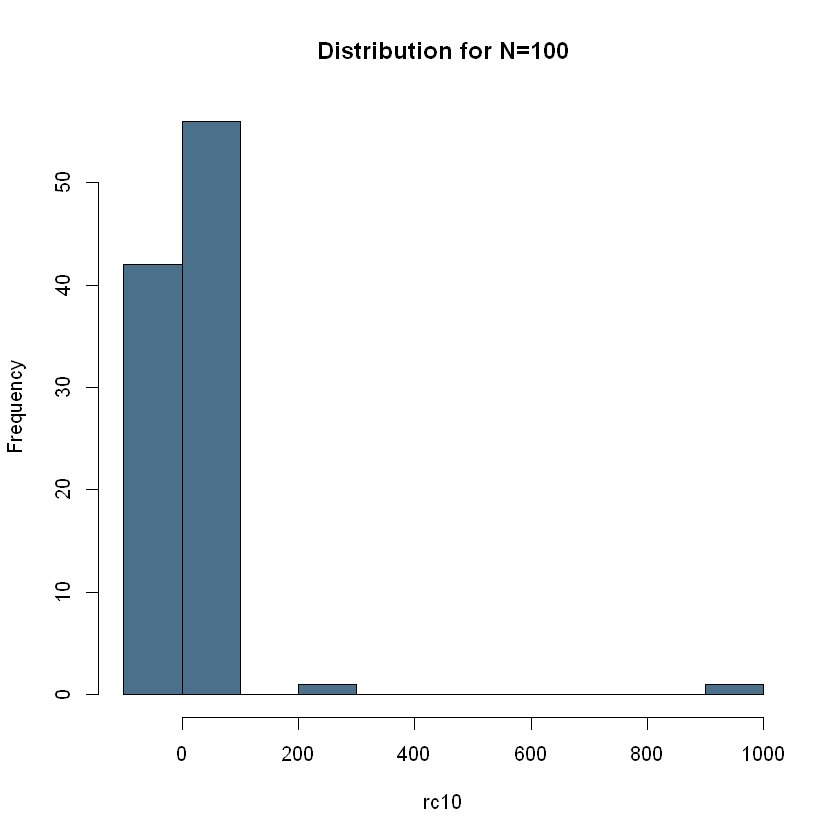

In [48]:
hist(rc10,  col = "skyblue4", main = "Distribution for N=100")

In [49]:
set.seed(200)
for (i in 1:500){
    rc1k <- rcauchy(n = 1000)
    rc1k_m <- mean(rc1k)
    rc1k_sd <- sd(rc1k)
    }
print(rc1k)
print(rc1k_m)
print(rc1k_sd)

   [1] -1.511612e-01 -9.740180e-01 -2.122286e-01  3.661592e+00  1.743707e-01
   [6]  6.244202e-01  1.098345e+00 -6.509315e-01  1.786852e-01  5.899898e+00
  [11]  7.241250e-01 -2.622178e+00  1.748036e-01  5.024752e-01  7.916297e-01
  [16] -7.795472e-01 -1.840174e+00 -1.349298e+00  1.096349e+00  2.269110e+00
  [21] -3.113769e+00  1.924670e+00 -2.019348e-02  2.467368e-01  1.125201e+00
  [26] -9.287381e-01 -5.533513e-01  9.001316e-01  7.753815e+00  4.680443e+00
  [31] -7.808621e-01  6.396847e+00 -8.338455e-01 -1.460595e+00  1.036080e+00
  [36] -3.584081e+00  1.749403e+00  3.403006e-01 -3.852235e+00 -1.475257e+00
  [41]  1.041351e-01 -1.772715e+00  2.712178e+00 -6.453033e-01 -9.103646e-01
  [46] -7.938121e-01 -2.047333e-01  6.017881e-01  3.593407e+00 -1.824688e+00
  [51] -1.588440e-01 -1.383988e+00 -5.461787e+00 -5.781823e-01  1.085820e+01
  [56]  4.859774e-02 -7.621160e-01 -2.387744e+00 -5.965064e+00  4.196225e+01
  [61]  3.929532e-01 -4.844979e-01  5.940750e-01 -2.289448e+00  3.130608e+00

[1] -5.050868
[1] 311.6798


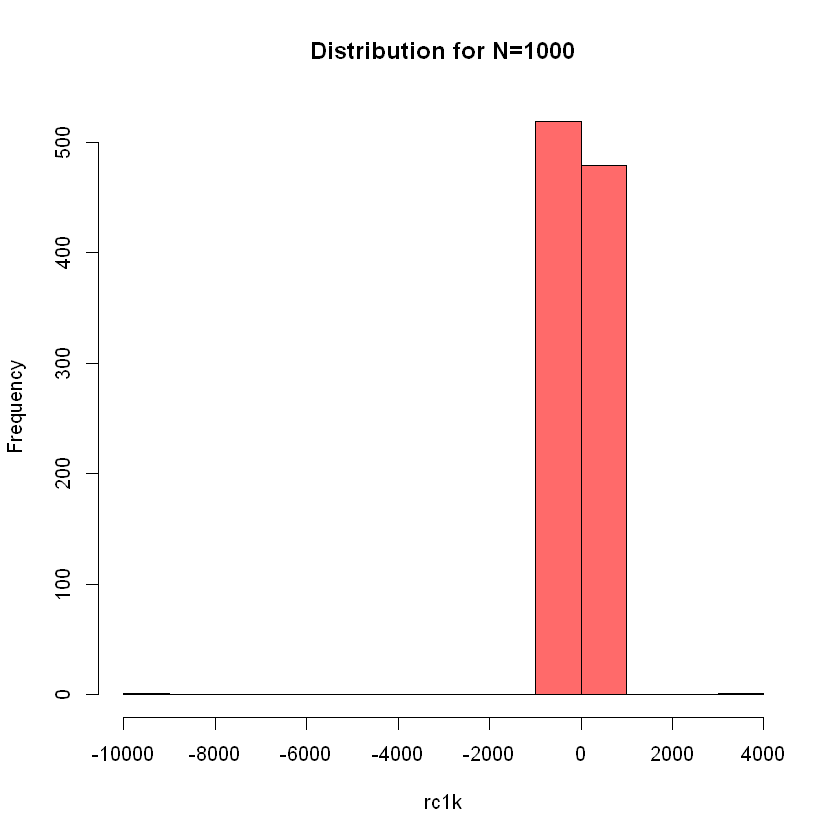

In [50]:
hist(rc1k,  col = "indianred1", main = "Distribution for N=1000")

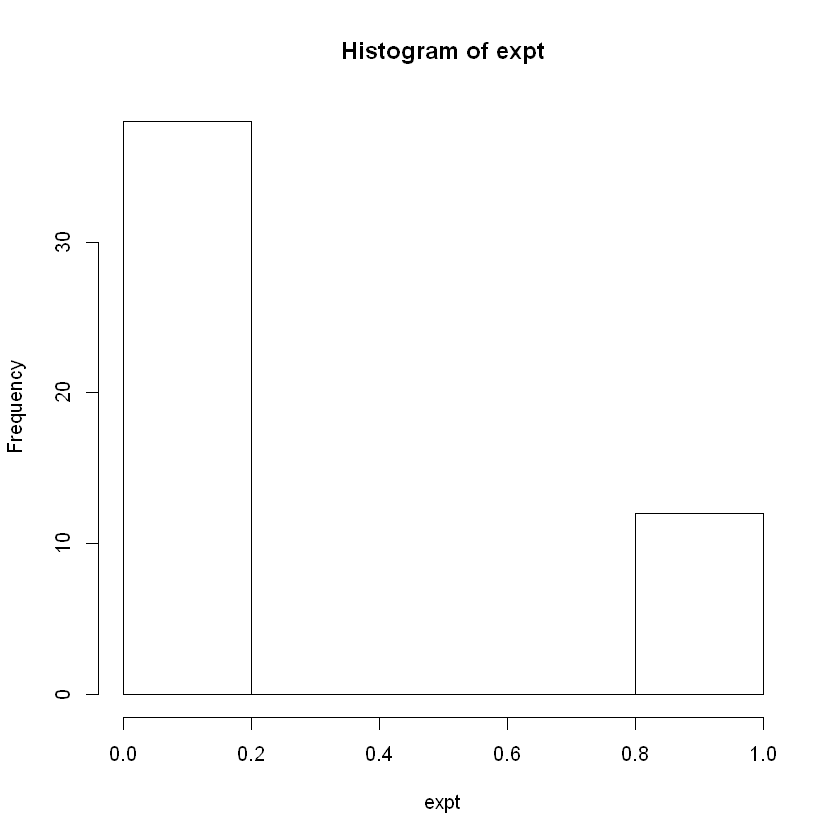

In [108]:
hist(expt)

# For both type of distribution as random variable was not mentioned I considered 10 for both.

In [124]:

for (i in 1:10000){
    poission <- rpois(n = 10, lambda =1.5)
    mean(poission)
    sd(poission)
}

In [125]:
for (i in 1:10000){
    binom <- rbinom( n=5, size = 10, prob = 0.15)
    mean(binom)
    sd(binom)
}

# 1b.

In [126]:
sd(poission) 

[1] 1.523884

In [127]:
summary(poission)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     1.0     2.0     2.1     3.0     5.0 

In [128]:
summary(binom)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0     0.8     1.0     3.0 

In [129]:
sd(binom)

[1] 1.30384

# 1c

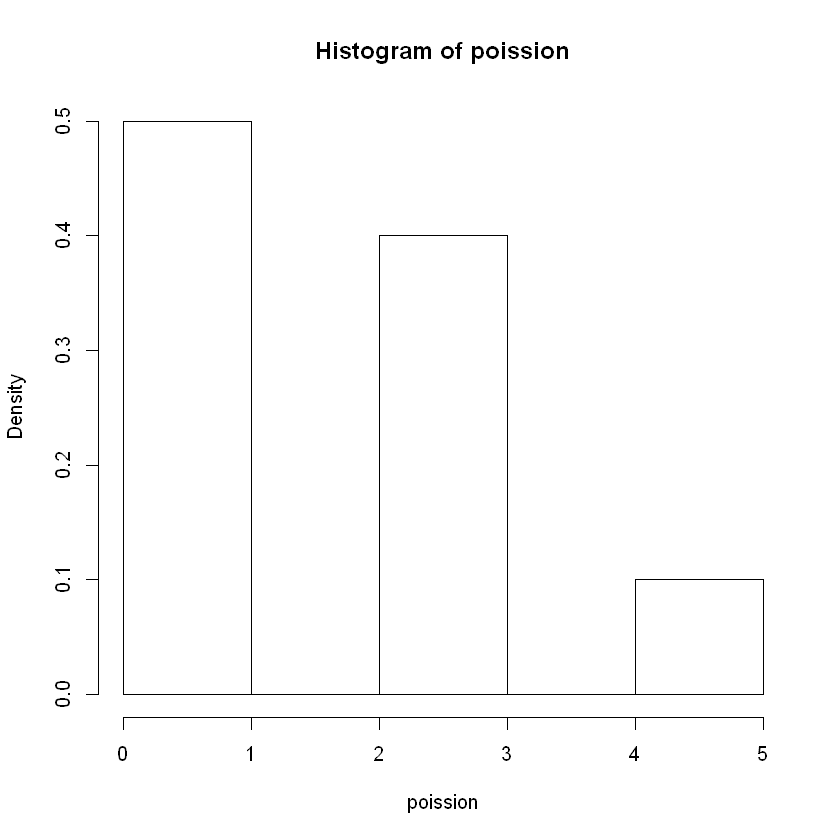

In [132]:
hist(poission, prob=TRUE)

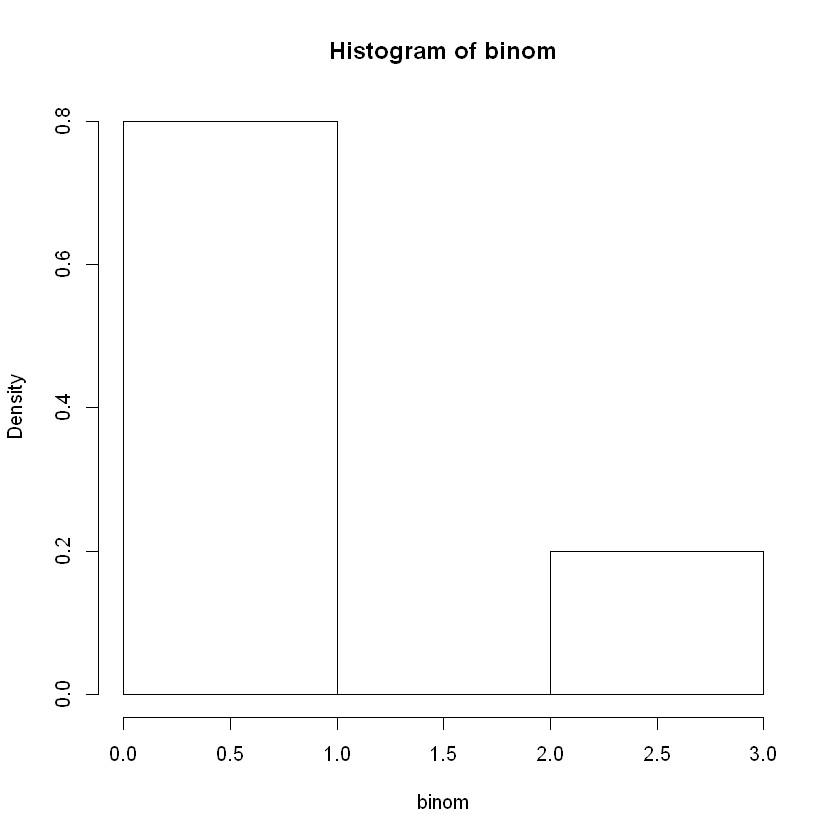

In [131]:
hist(binom, prob=0.15)

# 2a

# Binomial

In [27]:
sample <- 120
x1 <- 0.025 * 120
p <- 0.01
B_dist <- dbinom( size=sample, x=x1, prob=p)
print(B_dist)

[1] 0.08665163


# Poisson

In [26]:
sample <- 120
x1 <- 0.025 * 120
p <- 0.01

lambda <- sample*p
P_dist <- dpois(x=x1, lambda=lambda)

print(P_dist)

[1] 0.08674393


# Difference

In [32]:
d <- (P_dist - B_dist)
d

[1] 9.23039e-05

# Hint solution

In [4]:
n=seq(80,400,by=40)
p=seq(0.0025,.025,by=.0025)
np<-expand.grid(n=n,p=p)

# Approximation equ. 

In [15]:
np$lambda <- np$n*np$p
np$k <- 0.025*np$n

In [16]:
np$binomial <- dbinom(size=np$n, x= np$k, p =np$p)
np$poission  <- dpois(x = np$k, lambda = np$lambda)
np$difference <- (np$binomial - np$poission)

In [64]:
np$difference <- (np$binomial - np$poission)
diff <- np$difference 
summary(diff)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-3.778e-04 -1.456e-04  1.069e-05  6.553e-04  1.536e-03  3.441e-03 

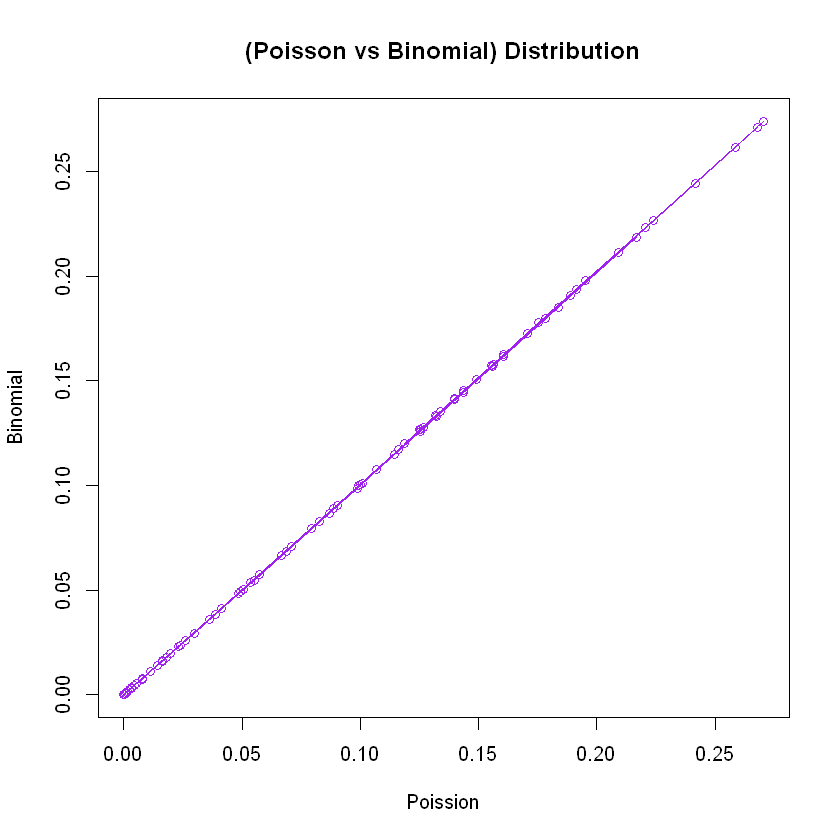

In [59]:
y2 <- np$binomial
y3 <- np$poission
plot(x=y3,y=y2, main= '(Poisson vs Binomial) Distribution', xlab = 'Poission', ylab= 'Binomial', type="o", col="purple")

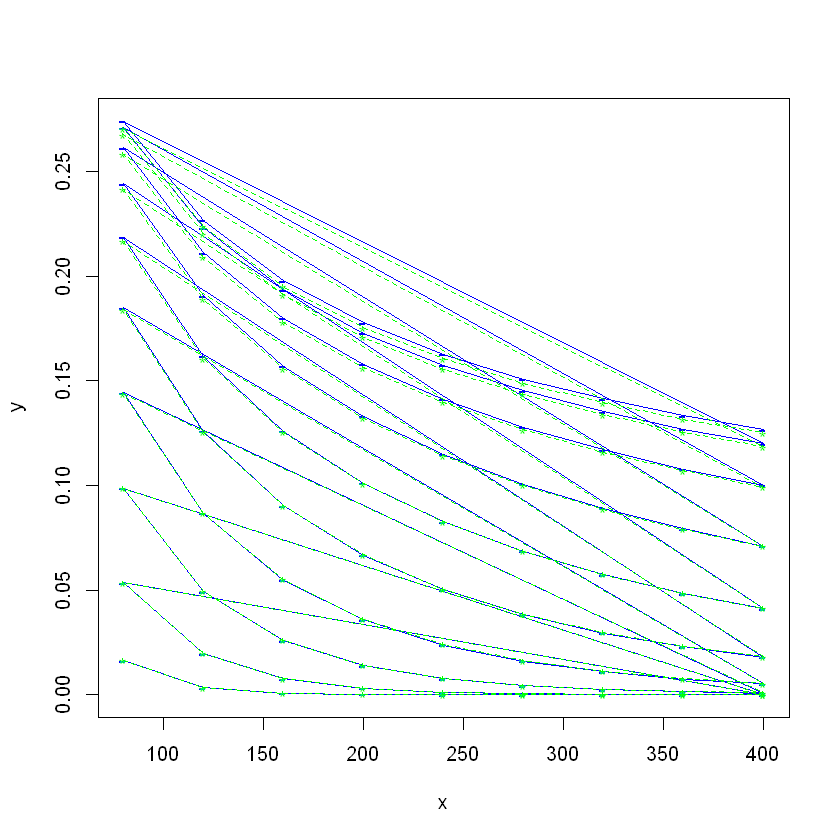

In [46]:
#generate an x-axis along with three data series
x <- np$n
#y1  <- np$p
y2 <- np$binomial
y3 <- np$poission


#plot the first data 
plot(x, y2, type="o", col="blue", pch="-", ylab="y", lty=1)

#add second data 
points(x, y3, col="green", pch="*")
lines(x, y3, col="green",lty=2)




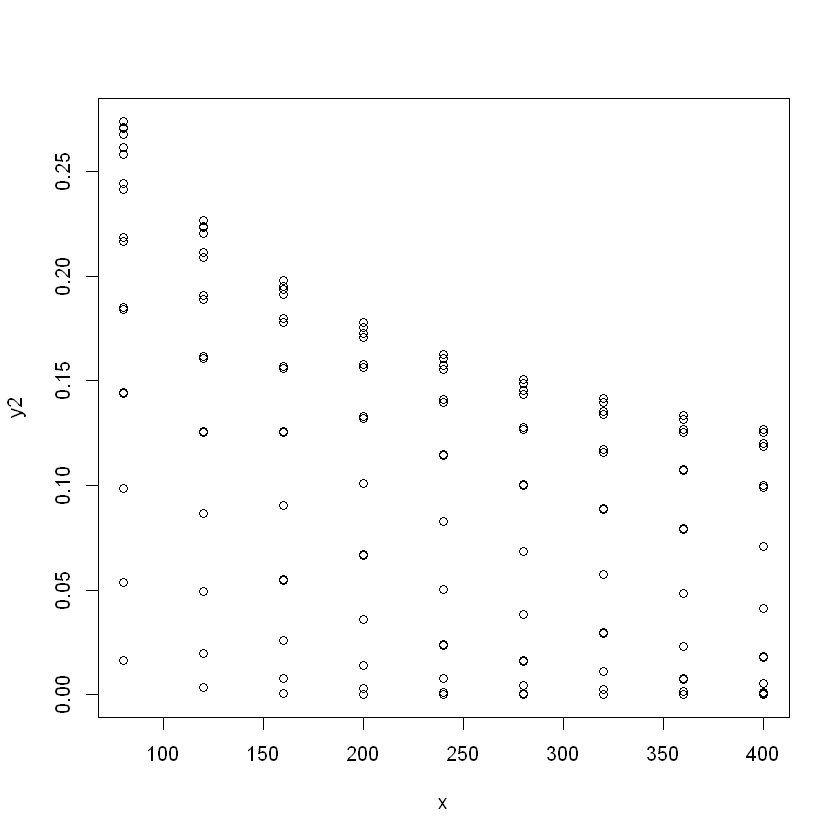

In [51]:
# first plot
plot(x, y2, ylim=range(c(y2,y3)))

# second plot  EDIT: needs to have same ylim
par(new = TRUE)
plot(x, y3, ylim=range(c(y2,y3)), axes = FALSE, xlab = "", ylab = "")

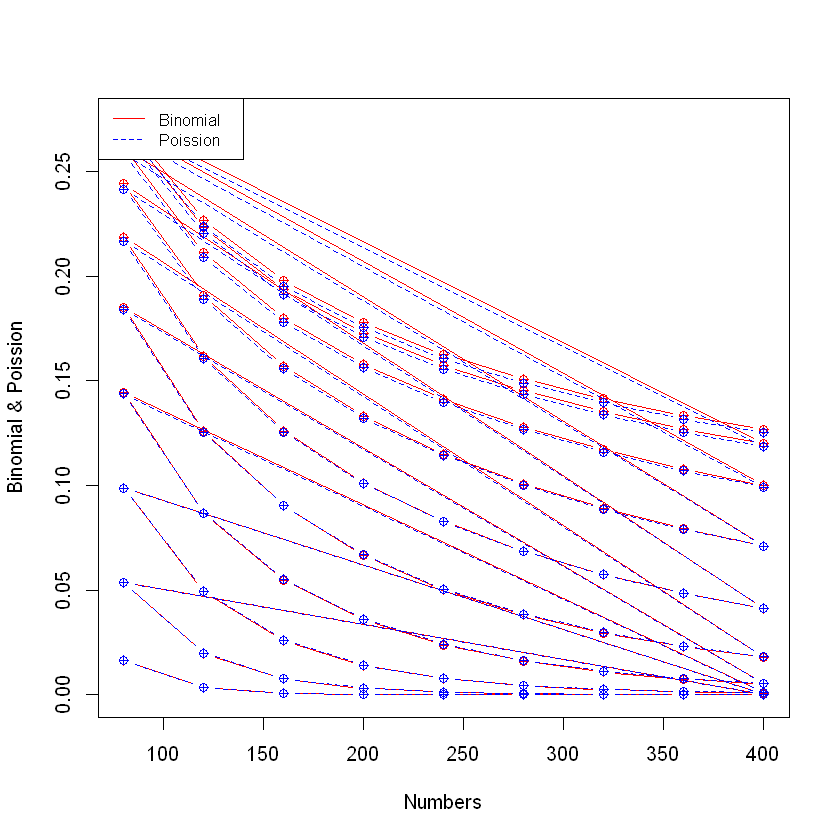

In [60]:
x <- np$n
y1 <- np$binomial
y2 <- np$poission
# Create a first line
plot(x, y1, type = "b", frame = TRUE, pch = 10, 
     col = "red", xlab = "Numbers", ylab = "Binomial & Poission")
# Add a second line
lines(x, y2, pch = 10, col = "blue", type = "b", lty = 2)
# Add a legend to the plot
legend("topleft", legend=c( "Binomial","Poission"),
       col=c("red", "blue"), lty = 1:2, cex=0.8)

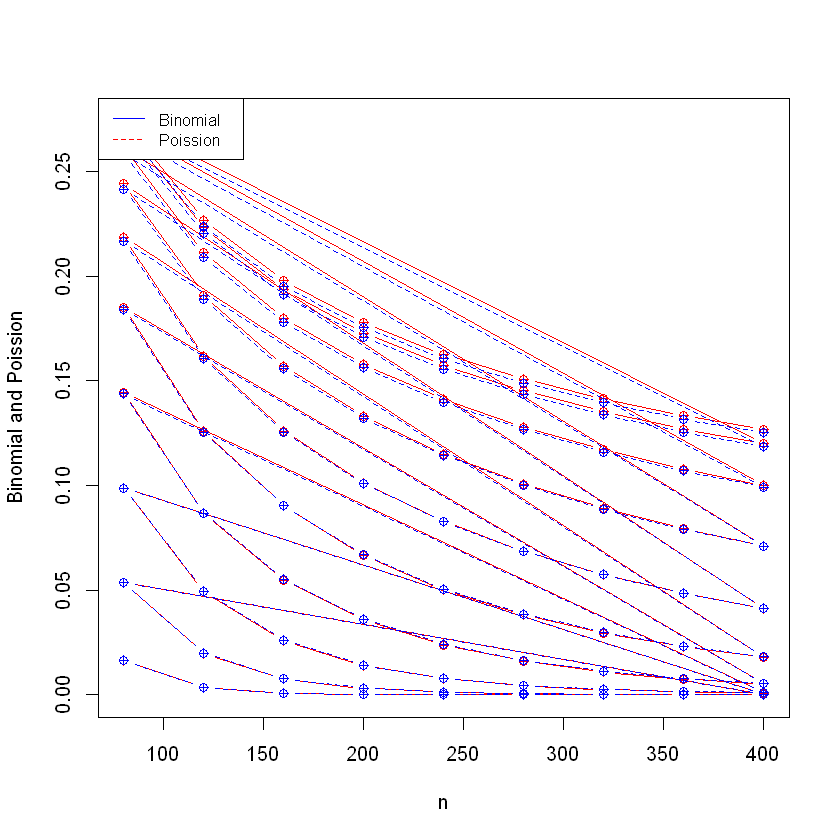

In [61]:
x <- np$n
y1 <- np$binomial
y2  <- np$poission
# Create a first line
plot(x, y1, type = "b", frame = TRUE, pch = 10, 
     col = "red", xlab = "n", ylab = "Binomial and Poission")
# Add a second line
lines(x, y2, pch = 10, col = "blue", type = "b", lty = 2)
# Add a legend to the plot
legend("topleft", legend=c( "Binomial","Poission"),
       col=c( "blue","red"), lty = 1:2, cex=0.8)

In [13]:
p <- seq(0.0025,.025,by=.0025)

In [14]:
np<-expand.grid(n=d,p=p)
np

n,p
40,0.0025
80,0.0025
120,0.0025
160,0.0025
200,0.0025
240,0.0025
280,0.0025
320,0.0025
360,0.0025
400,0.0025


In [ ]:
p=seq(0.0025,.025,by=.0025)
 np<-expand.grid(n=d,p=p)

In [30]:
set.seed(324)
for (i in 1:5){
    df <- rbinom(n=10, size = 1, prob = 0.15)
    mean_d <- mean(df)
}

In [34]:
set.seed(324)

num = 500
sample = 20

a_s = matrix(rbinom(num*sample,1,0.15), num, sample)
vec <- apply(a_s,1,mean)

In [35]:
vec

[1] 0.25 0.10 0.15 0.05 0.20 0.15 0.20 0.10 0.05 0.15 0.30 0.20 0.10 0.10 0.20
 [16] 0.15 0.05 0.10 0.15 0.35 0.20 0.10 0.15 0.15 0.10 0.15 0.20 0.10 0.25 0.15
 [31] 0.15 0.30 0.10 0.10 0.20 0.05 0.15 0.20 0.25 0.20 0.35 0.20 0.00 0.15 0.10
 [46] 0.20 0.20 0.20 0.00 0.15 0.20 0.15 0.20 0.00 0.15 0.15 0.20 0.20 0.20 0.10
 [61] 0.35 0.00 0.30 0.25 0.15 0.25 0.25 0.25 0.20 0.20 0.30 0.25 0.15 0.10 0.15
 [76] 0.25 0.20 0.05 0.05 0.20 0.25 0.10 0.15 0.25 0.10 0.15 0.05 0.05 0.10 0.20
 [91] 0.15 0.05 0.05 0.00 0.15 0.20 0.25 0.05 0.25 0.00 0.10 0.00 0.10 0.25 0.05
[106] 0.10 0.05 0.10 0.10 0.20 0.20 0.15 0.25 0.10 0.25 0.20 0.15 0.15 0.10 0.10
[121] 0.15 0.15 0.10 0.20 0.15 0.20 0.20 0.15 0.30 0.05 0.15 0.05 0.05 0.10 0.15
[136] 0.05 0.15 0.10 0.35 0.10 0.10 0.10 0.20 0.20 0.00 0.20 0.20 0.05 0.05 0.15
[151] 0.00 0.20 0.15 0.10 0.05 0.25 0.10 0.10 0.00 0.05 0.10 0.20 0.15 0.05 0.05
[166] 0.35 0.10 0.05 0.20 0.10 0.10 0.35 0.20 0.00 0.10 0.10 0.10 0.30 0.25 0.05
[181] 0.25 0.15 0.30 0.10 0.10 0.05 0.10 0.25 0.15 0.10 0.20 0.15 0.15 0.30 0.20
[196] 0.05 0.10 0.20 0.15 0.20 0.25 0.20 0.15 0.05 0.20 0.05 0.00 0.10 0.05 0.25
[211] 0.10 0.30 0.05 0.15 0.25 0.10 0.15 0.00 0.25 0.15 0.10 0.20 0.10 0.10 0.20
[226] 0.05 0.05 0.10 0.15 0.20 0.05 0.25 0.10 0.35 0.15 0.20 0.05 0.05 0.30 0.10
[241] 0.10 0.30 0.25 0.15 0.25 0.20 0.05 0.10 0.25 0.25 0.10 0.15 0.00 0.15 0.10
[256] 0.05 0.20 0.15 0.15 0.10 0.15 0.10 0.05 0.15 0.20 0.30 0.10 0.05 0.05 0.15
[271] 0.15 0.10 0.20 0.15 0.25 0.10 0.15 0.10 0.25 0.15 0.15 0.25 0.30 0.25 0.30
[286] 0.10 0.10 0.30 0.10 0.20 0.05 0.20 0.05 0.05 0.15 0.10 0.15 0.05 0.15 0.05
[301] 0.00 0.10 0.15 0.20 0.20 0.20 0.15 0.05 0.10 0.15 0.20 0.10 0.15 0.20 0.20
[316] 0.20 0.05 0.20 0.25 0.20 0.15 0.25 0.15 0.05 0.20 0.15 0.25 0.10 0.30 0.25
[331] 0.05 0.25 0.35 0.05 0.00 0.15 0.10 0.10 0.15 0.10 0.10 0.10 0.15 0.05 0.15
[346] 0.05 0.20 0.10 0.10 0.20 0.15 0.10 0.05 0.10 0.05 0.10 0.15 0.05 0.20 0.15
[361] 0.10 0.30 0.10 0.10 0.15 0.25 0.15 0.15 0.10 0.15 0.20 0.00 0.20 0.20 0.30
[376] 0.25 0.20 0.35 0.20 0.20 0.05 0.15 0.20 0.20 0.20 0.10 0.20 0.25 0.05 0.15
[391] 0.20 0.05 0.20 0.05 0.05 0.25 0.15 0.25 0.10 0.05 0.15 0.10 0.10 0.00 0.05
[406] 0.20 0.05 0.05 0.25 0.05 0.10 0.30 0.35 0.10 0.10 0.20 0.15 0.10 0.05 0.10
[421] 0.25 0.10 0.30 0.10 0.10 0.10 0.20 0.20 0.15 0.05 0.25 0.25 0.05 0.00 0.10
[436] 0.15 0.05 0.25 0.10 0.20 0.10 0.20 0.15 0.10 0.20 0.15 0.15 0.20 0.05 0.20
[451] 0.05 0.20 0.20 0.05 0.35 0.15 0.10 0.15 0.20 0.05 0.10 0.10 0.05 0.20 0.15
[466] 0.25 0.05 0.15 0.05 0.00 0.20 0.10 0.15 0.25 0.25 0.20 0.20 0.10 0.05 0.25
[481] 0.20 0.15 0.25 0.30 0.05 0.05 0.05 0.20 0.30 0.20 0.15 0.15 0.15 0.05 0.25
[496] 0.15 0.10 0.45 0.05 0.10